## Comparison of the Bayes scores

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [229]:
# Load datasets
B_Chi = np.load('/home/philcox/Save/SCORES/Chieffi04Score/Bayes_score - Chieffi04, Karakas_net_yield, Seitenzahl.npz')
B_Def = np.load('/home/philcox/Save/SCORES/Nomoto_netScore/Bayes_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
B_Ven = np.load('/home/philcox/Save/SCORES/Ventura/Bayes_score - Nomoto2013_net, Ventura, Seitenzahl.npz')
B_Thi = np.load('/home/philcox/Save/SCORES/Thielemann/Bayes_score - Nomoto2013_net, Karakas_net_yield, Thielemann.npz')
beta_param = B_Chi['beta_param']
scoreBC = B_Chi['score']
scoreBD = B_Def['score']
scoreBV = B_Ven['score']
scoreBT = B_Thi['score']
score_errBC = B_Chi['score_err']
score_errBD = B_Def['score_err']
score_errBV = B_Ven['score_err']
score_errBT = B_Thi['score_err']
B_Chi.close()
B_Def.close()
B_Ven.close()
B_Thi.close()

In [230]:
scores = [scoreBD,scoreBC,scoreBV,scoreBT]
errors = [score_errBD,score_errBC,score_errBV,score_errBT]
names = ['Default','+Chieffi04','+Ventura13', '+Thielemann03']
shapes = ['x','v','.','^']
colors = ['k','r','b','g']

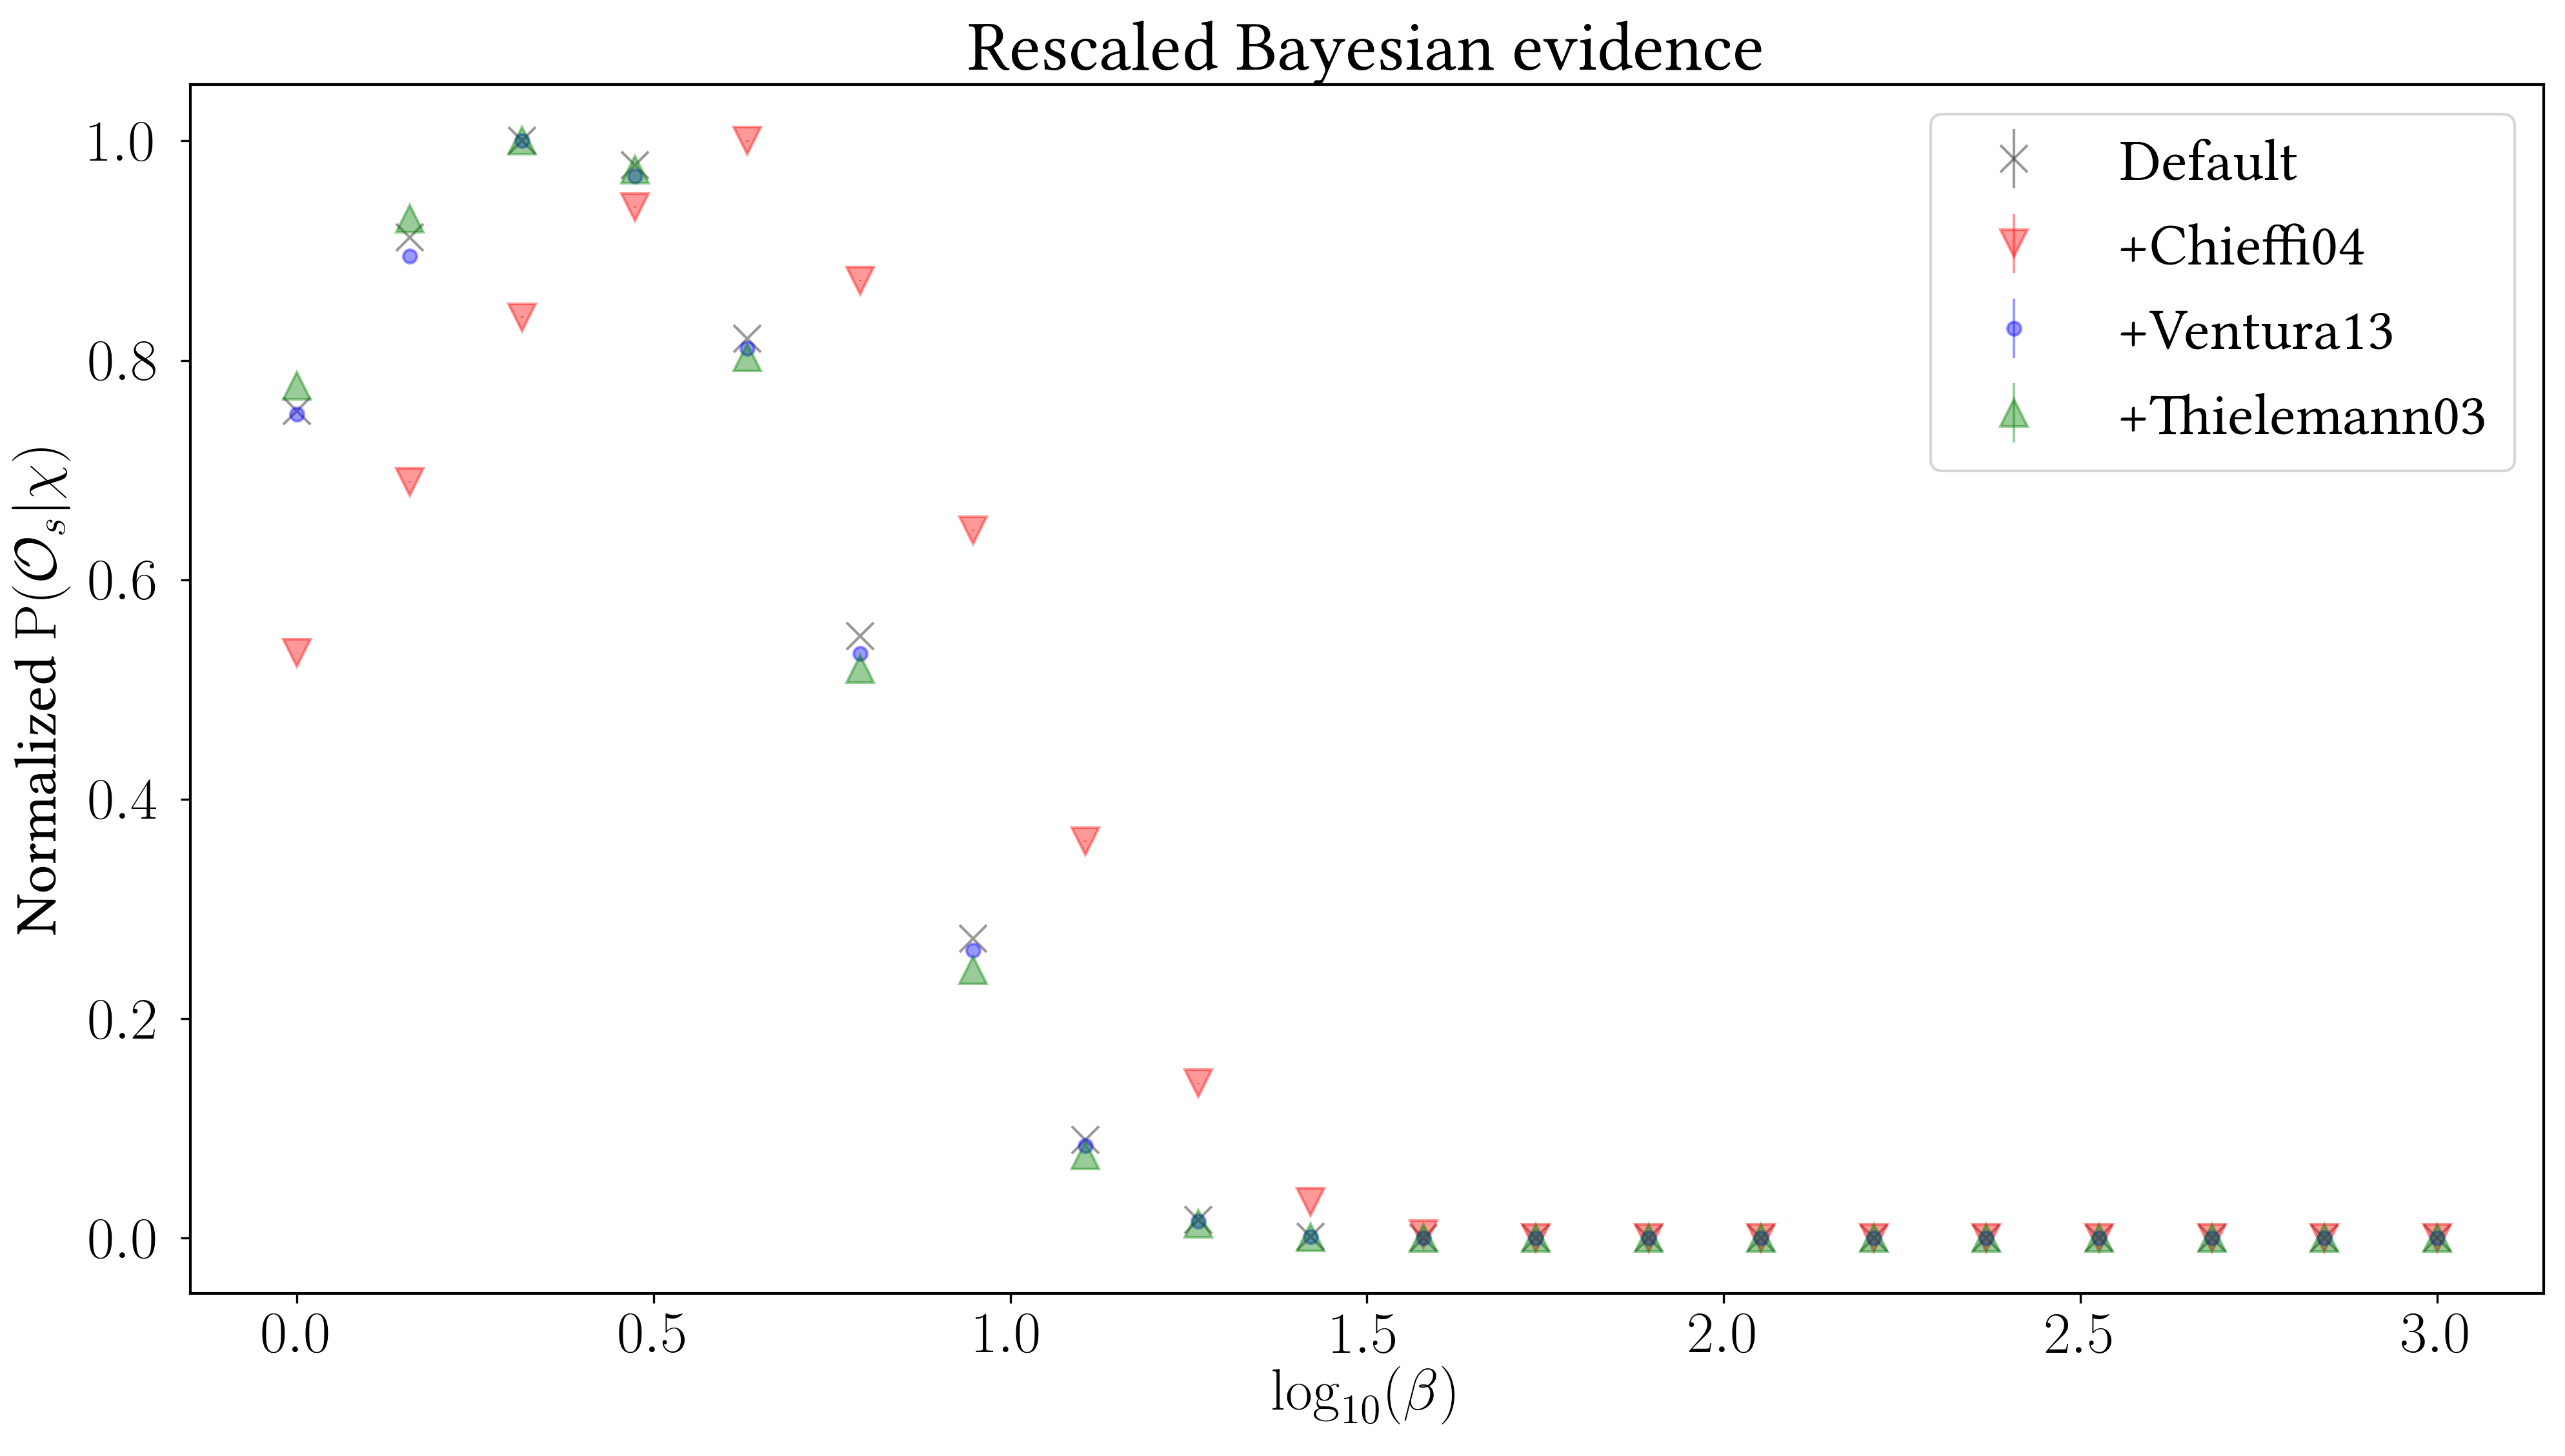

In [231]:
# Plot parameters
text_size = 22
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)
      

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),scores[i]/max(scores[i]),yerr=errors[i],fmt=shapes[i],label=names[i],ms=10,c=colors[i],alpha=0.4) 
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'Normalized $\mathrm{P}(\mathcal{O}_s|\chi)$')
plt.title('Rescaled Bayesian evidence')
plt.legend()
plt.savefig('PaperPlots/RescaledEvidence.pdf')

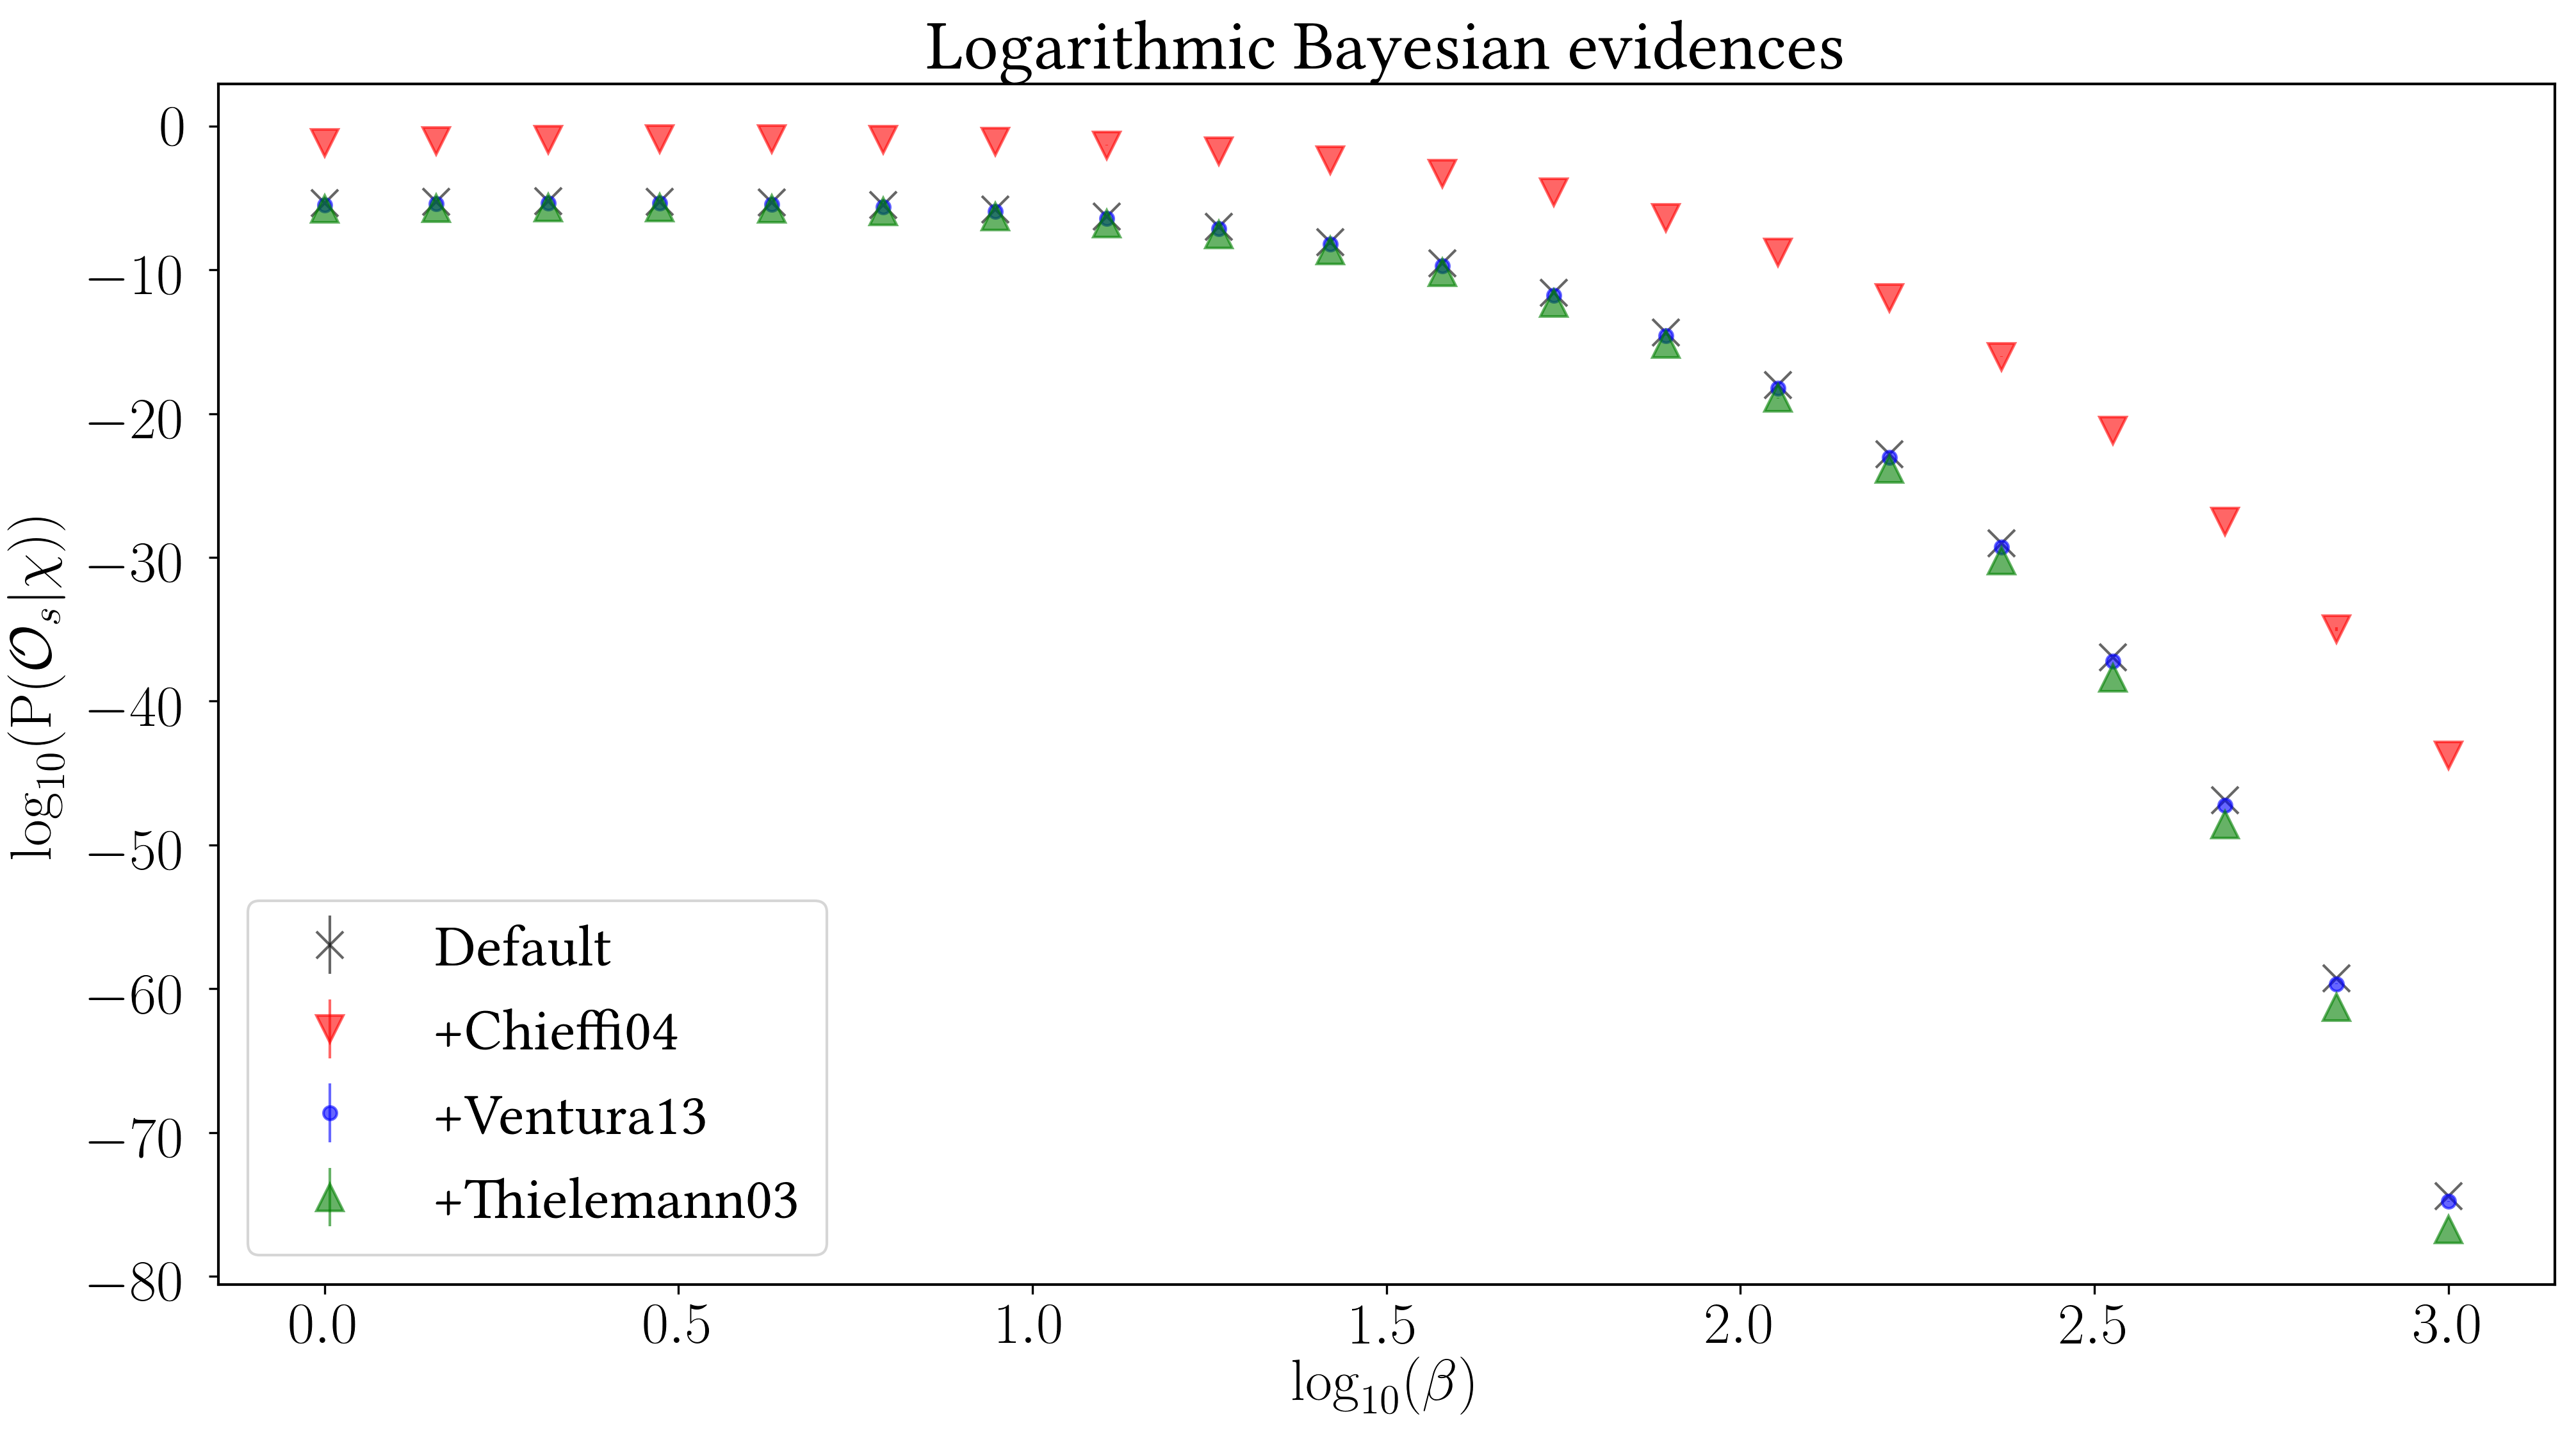

In [218]:
text_size = 22
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)

for i in [0,1,2,3]:
    log_error = errors[i]/(scores[i]*np.log(10))
    plt.errorbar(np.log10(beta_param),np.log10(scores[i]),fmt=shapes[i],yerr = log_error,label=names[i],c=colors[i],ms=10,alpha=0.6) 
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'$\log_{10}(\mathrm{P}(\mathcal{O}_s|\chi))$')
plt.legend()
plt.title('Logarithmic Bayesian evidences')
plt.savefig('PaperPlots/logEvidence.pdf')

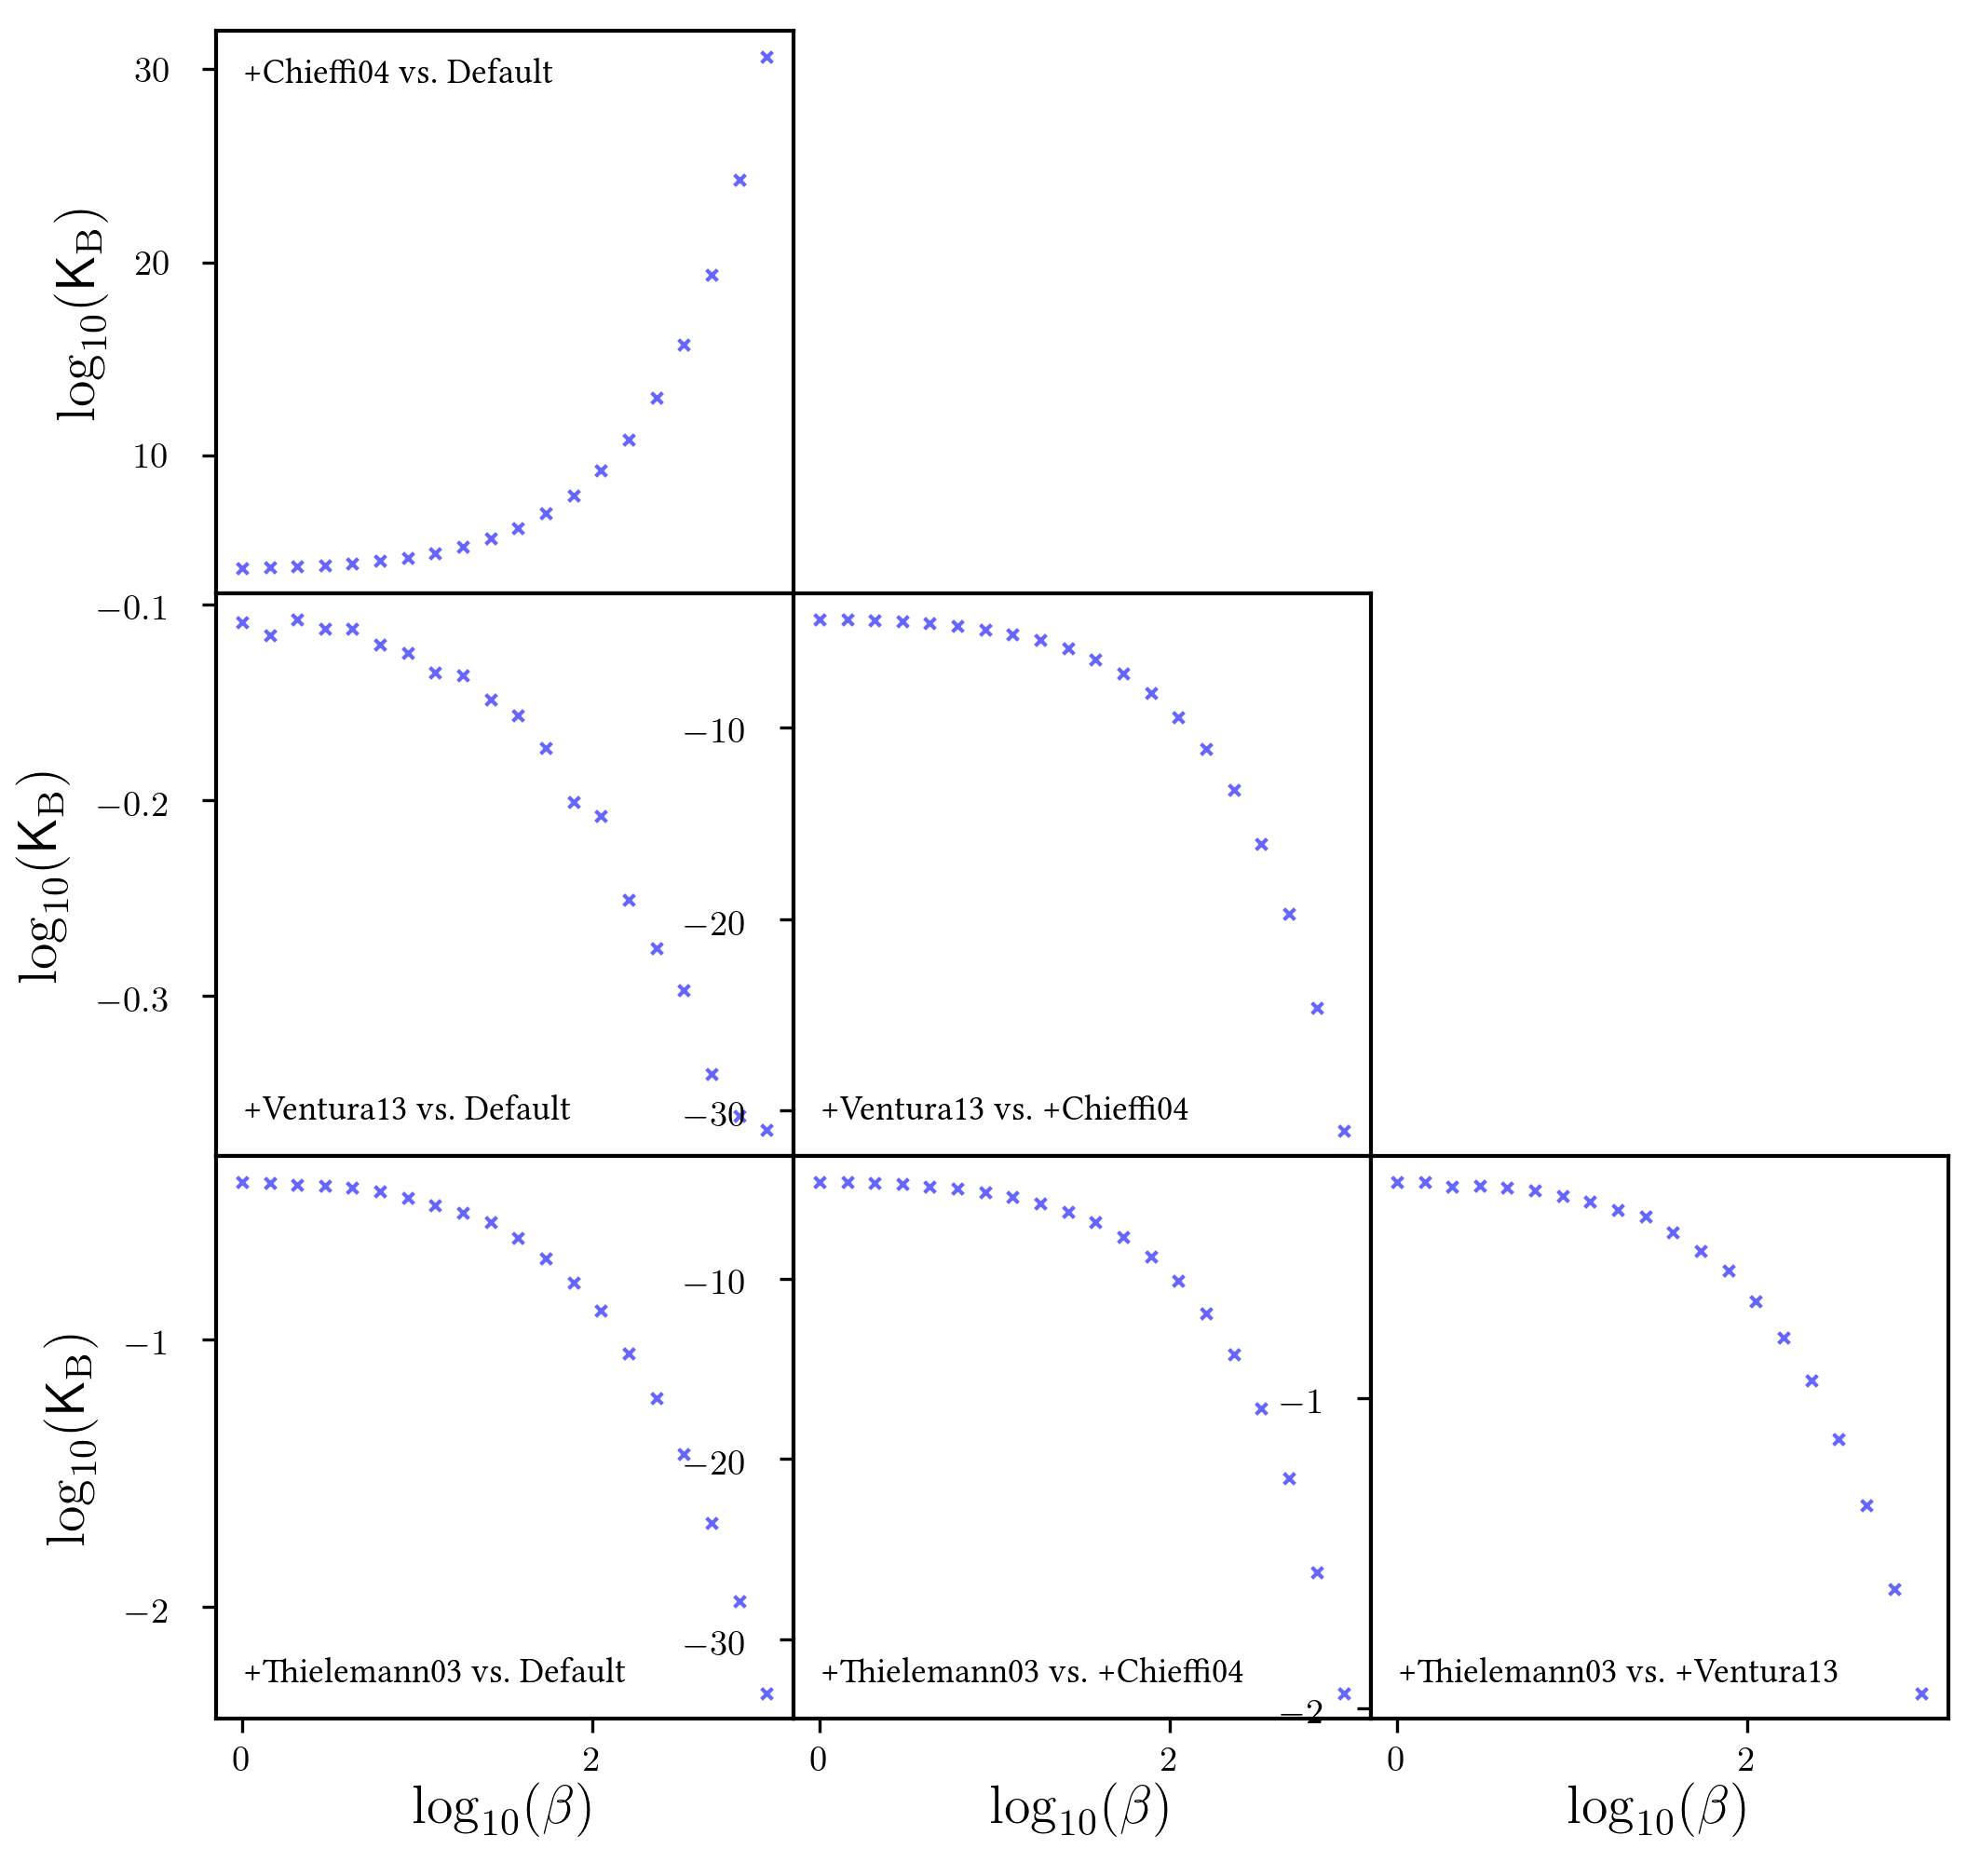

In [256]:
fig,axes = plt.subplots(nrows = 3, ncols = 3,figsize=(8.,8.),dpi=300)
text_size = 14
small_text = 9
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=small_text)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
alpha = 0.6
lw=2 # Linewidth
wspace = 0.0 # blankspace width between subplots
hspace = 0.0# blankspace height between subplots
plt.subplots_adjust(wspace=wspace,hspace=hspace)
# Create plot
for i in range(3):
    for j in range(3):
        axes[i,j].locator_params(nbins=3)
        if i>j or i==j:
            axes[i,j].scatter(np.log10(beta_param),np.log10(scores[i+1]/scores[j]),c='b',marker='x',alpha=alpha,s=8)
            if i == 2:
                axes[i,j].set_xlabel(r'$\log_{10}(\beta)$')
            if j == 0:
                axes[i,j].set_ylabel(r'$\log_{10}(\mathsf{K}_\mathrm{B})$')
            if i == 0 and j == 0:
                axes[i,j].text(0.05, 0.95, str(names[i+1])+' vs. '+str(names[j]),verticalalignment='top', horizontalalignment='left',transform=axes[i,j].transAxes,color='k', fontsize=small_text)
            else:
                axes[i,j].text(0.05, 0.05, str(names[i+1])+' vs. '+str(names[j]),verticalalignment='bottom', horizontalalignment='left',transform=axes[i,j].transAxes,color='k', fontsize=small_text)
        if j>i:
            axes[i,j].axis('off')
plt.show()
fig.savefig('PaperPlots/BayesComparison.pdf')


## Comparison of the Hogg Scores

In [250]:
# Load datasets
H_Chi = np.load('/home/philcox/Save/SCORES/Chieffi04Score/Hogg_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
H_Def = np.load('/home/philcox/Save/SCORES/Nomoto_netScore/Hogg_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
H_Ven = np.load('/home/philcox/Save/SCORES/Ventura/Hogg_score - Nomoto2013_net, Ventura, Seitenzahl.npz')
H_Thi = np.load('/home/philcox/Save/SCORES/Thielemann/Hogg_score - Nomoto2013_net, Karakas_net_yield, Thielemann.npz')
beta_param = H_Chi['beta_param']
scoreHC = H_Chi['score']
scoreHD = H_Def['score']
scoreHV = H_Ven['score']
scoreHT = H_Thi['score']
H_Chi.close()
H_Def.close()
H_Ven.close()
H_Thi.close()

In [251]:
scores2 = [scoreHD,scoreHC,scoreHV,scoreHT]

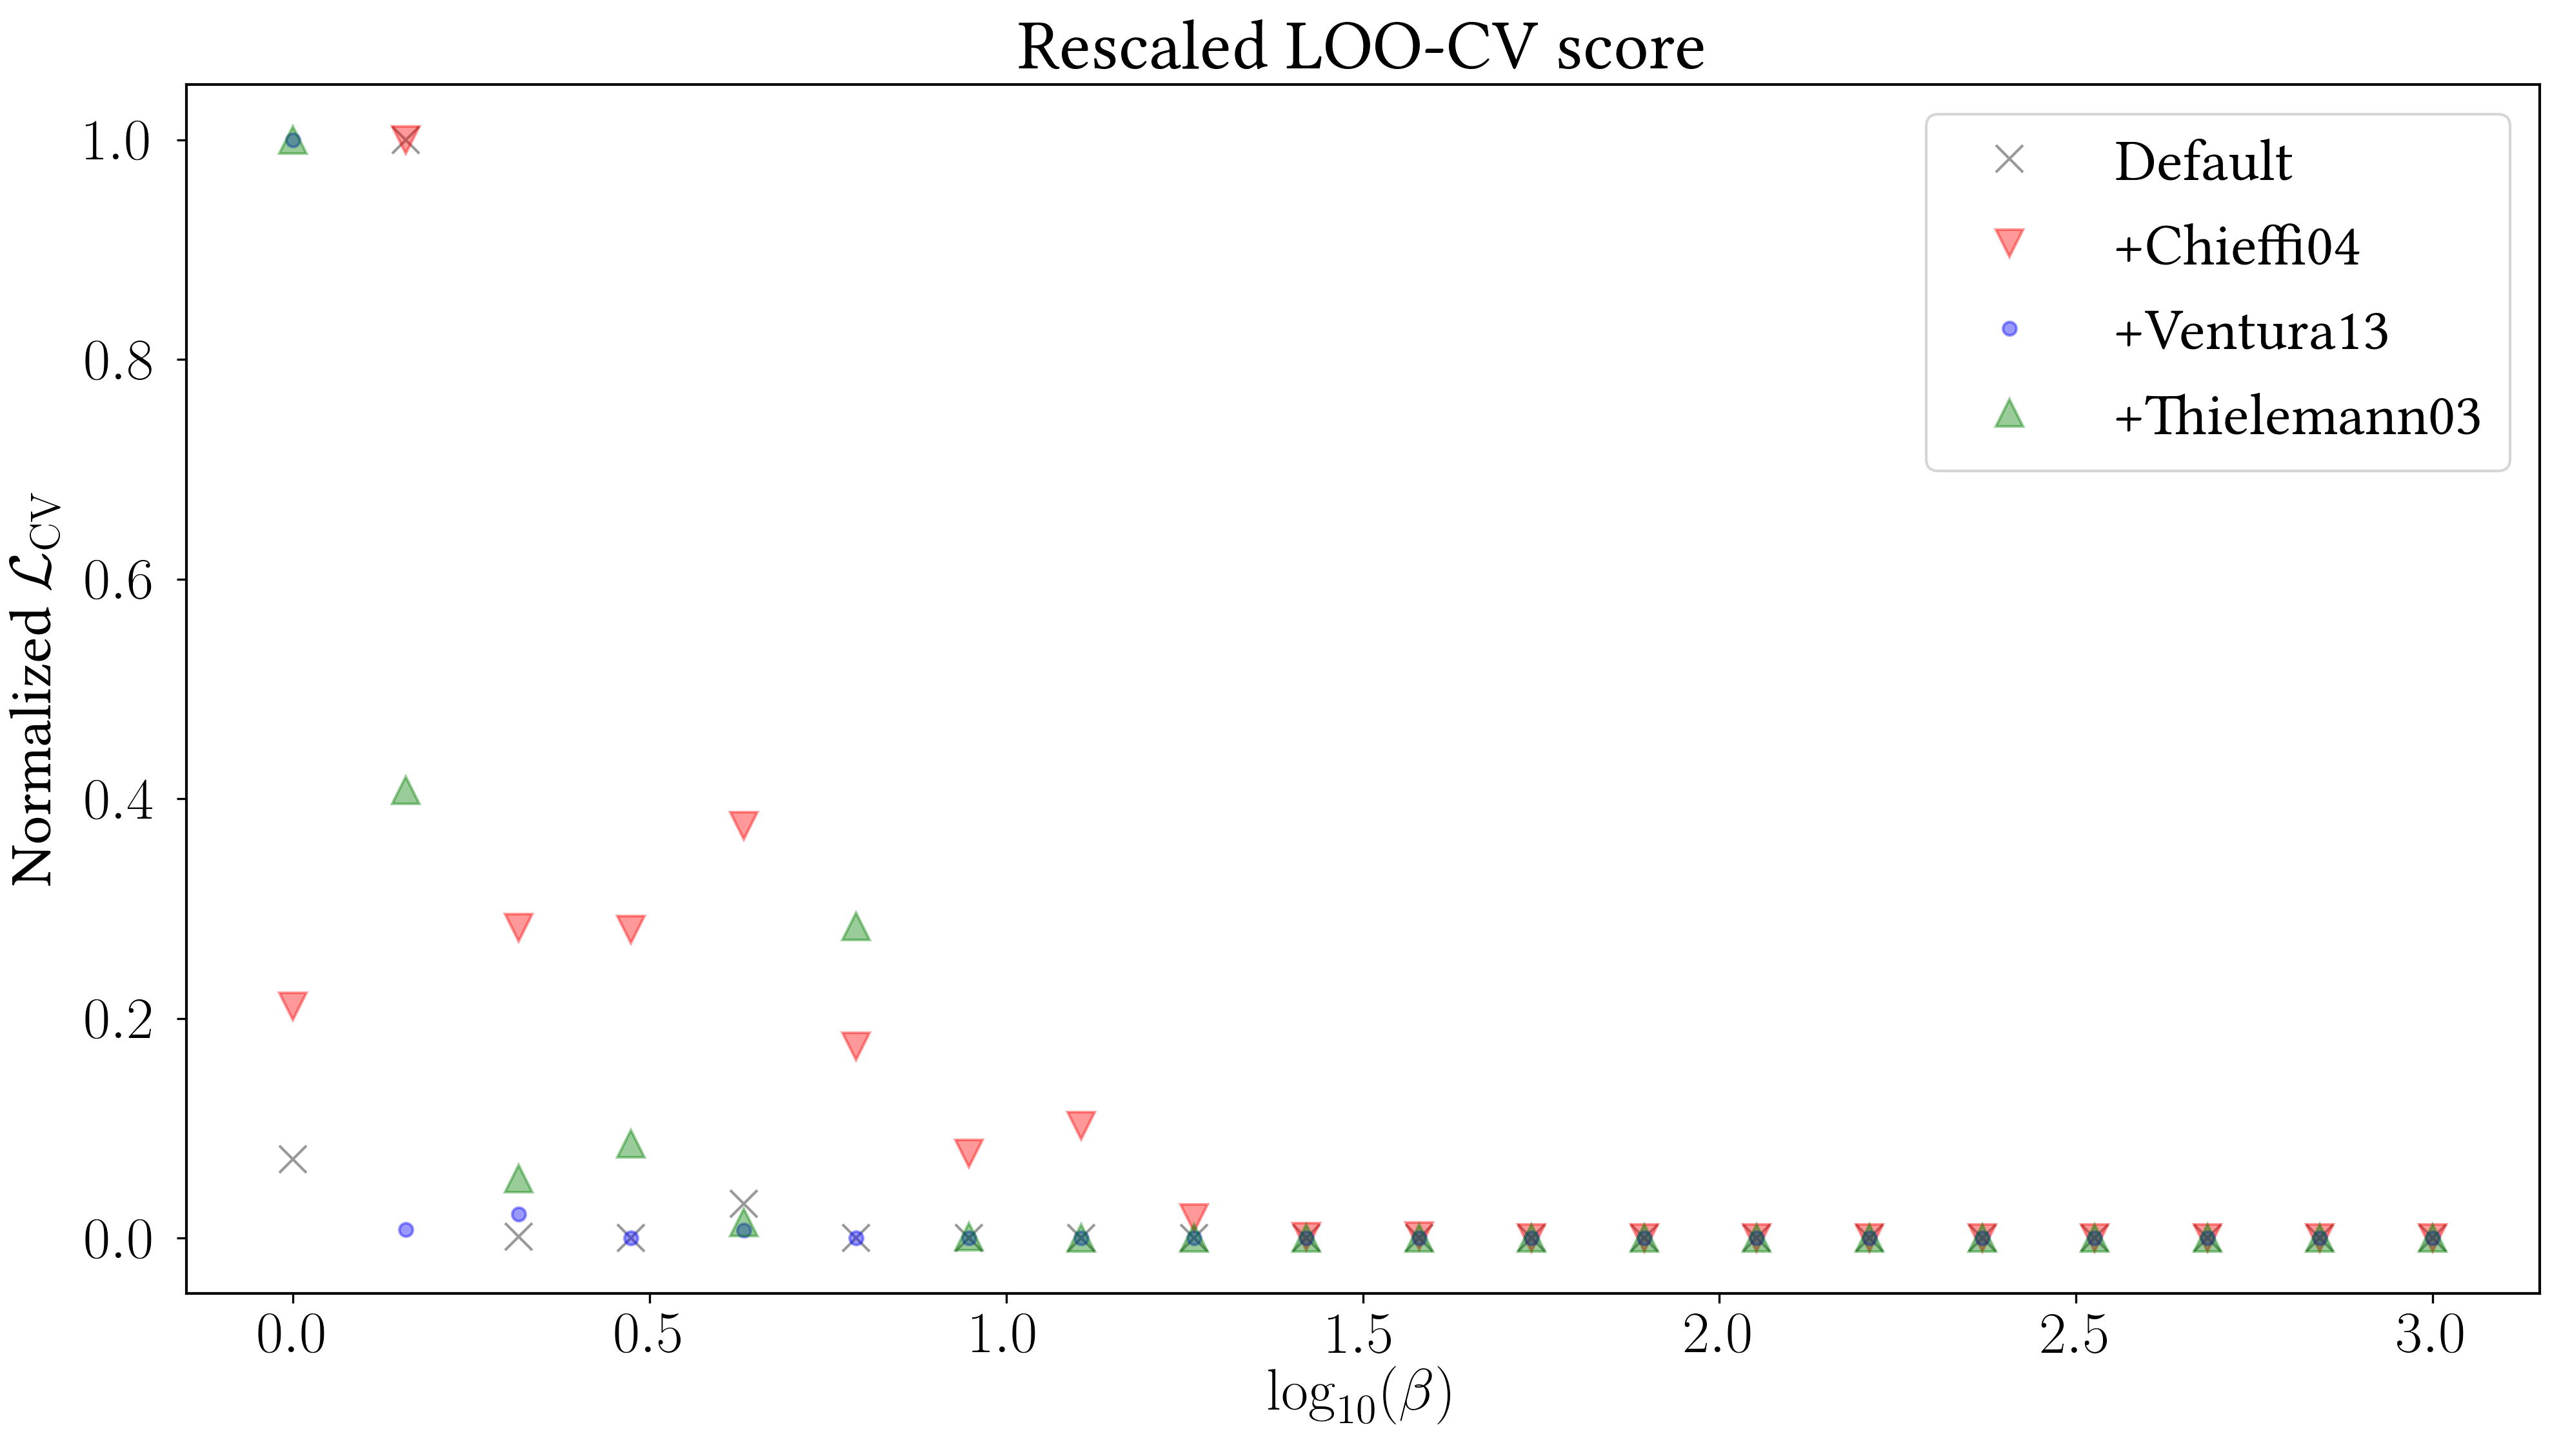

In [252]:
# Plot parameters
text_size = 22
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)
      

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),scores2[i]/max(scores2[i]),fmt=shapes[i],label=names[i],ms=10,c=colors[i],alpha=0.4) 
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'Normalized $\mathcal{L}_\mathrm{CV}$')
plt.title('Rescaled LOO-CV score')
plt.legend()
plt.savefig('PaperPlots/RescaledHogg.pdf')

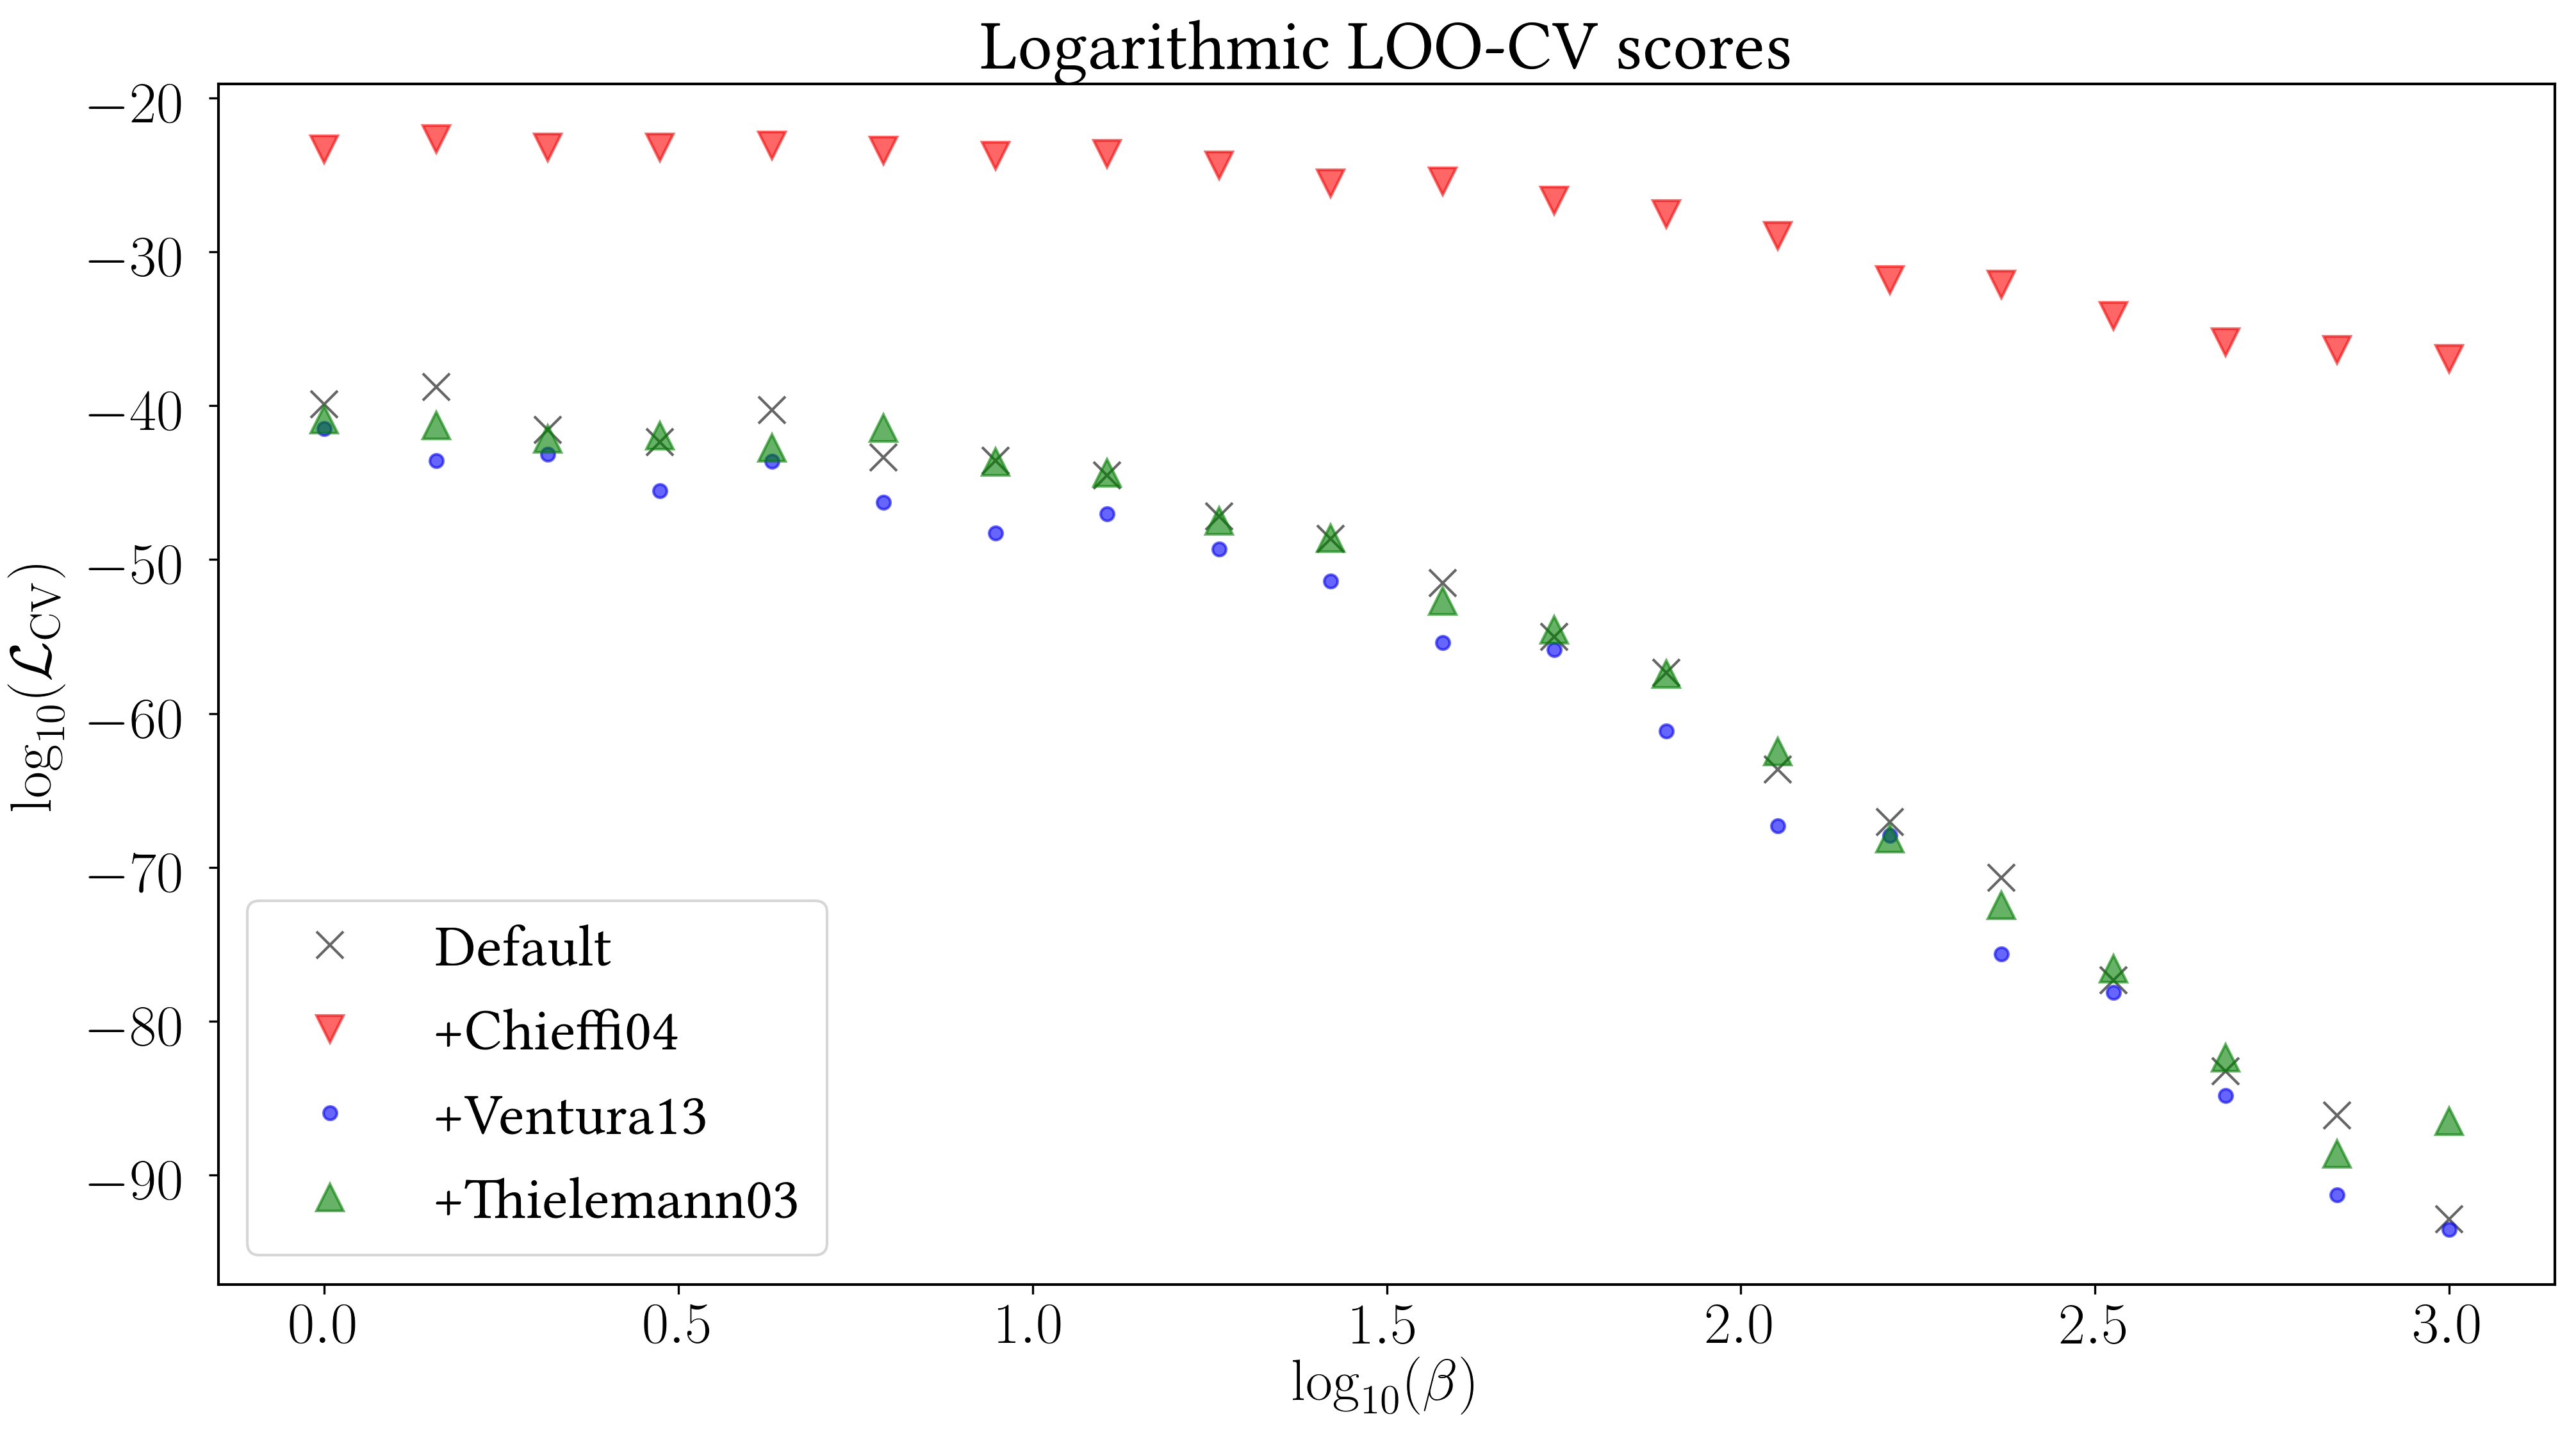

In [253]:
text_size = 22
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),np.log10(scores2[i]),fmt=shapes[i],label=names[i],c=colors[i],ms=10,alpha=0.6) 
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'$\log_{10}(\mathcal{L}_\mathrm{CV})$')
plt.legend()
plt.title('Logarithmic LOO-CV scores')
plt.savefig('PaperPlots/logHogg.pdf')

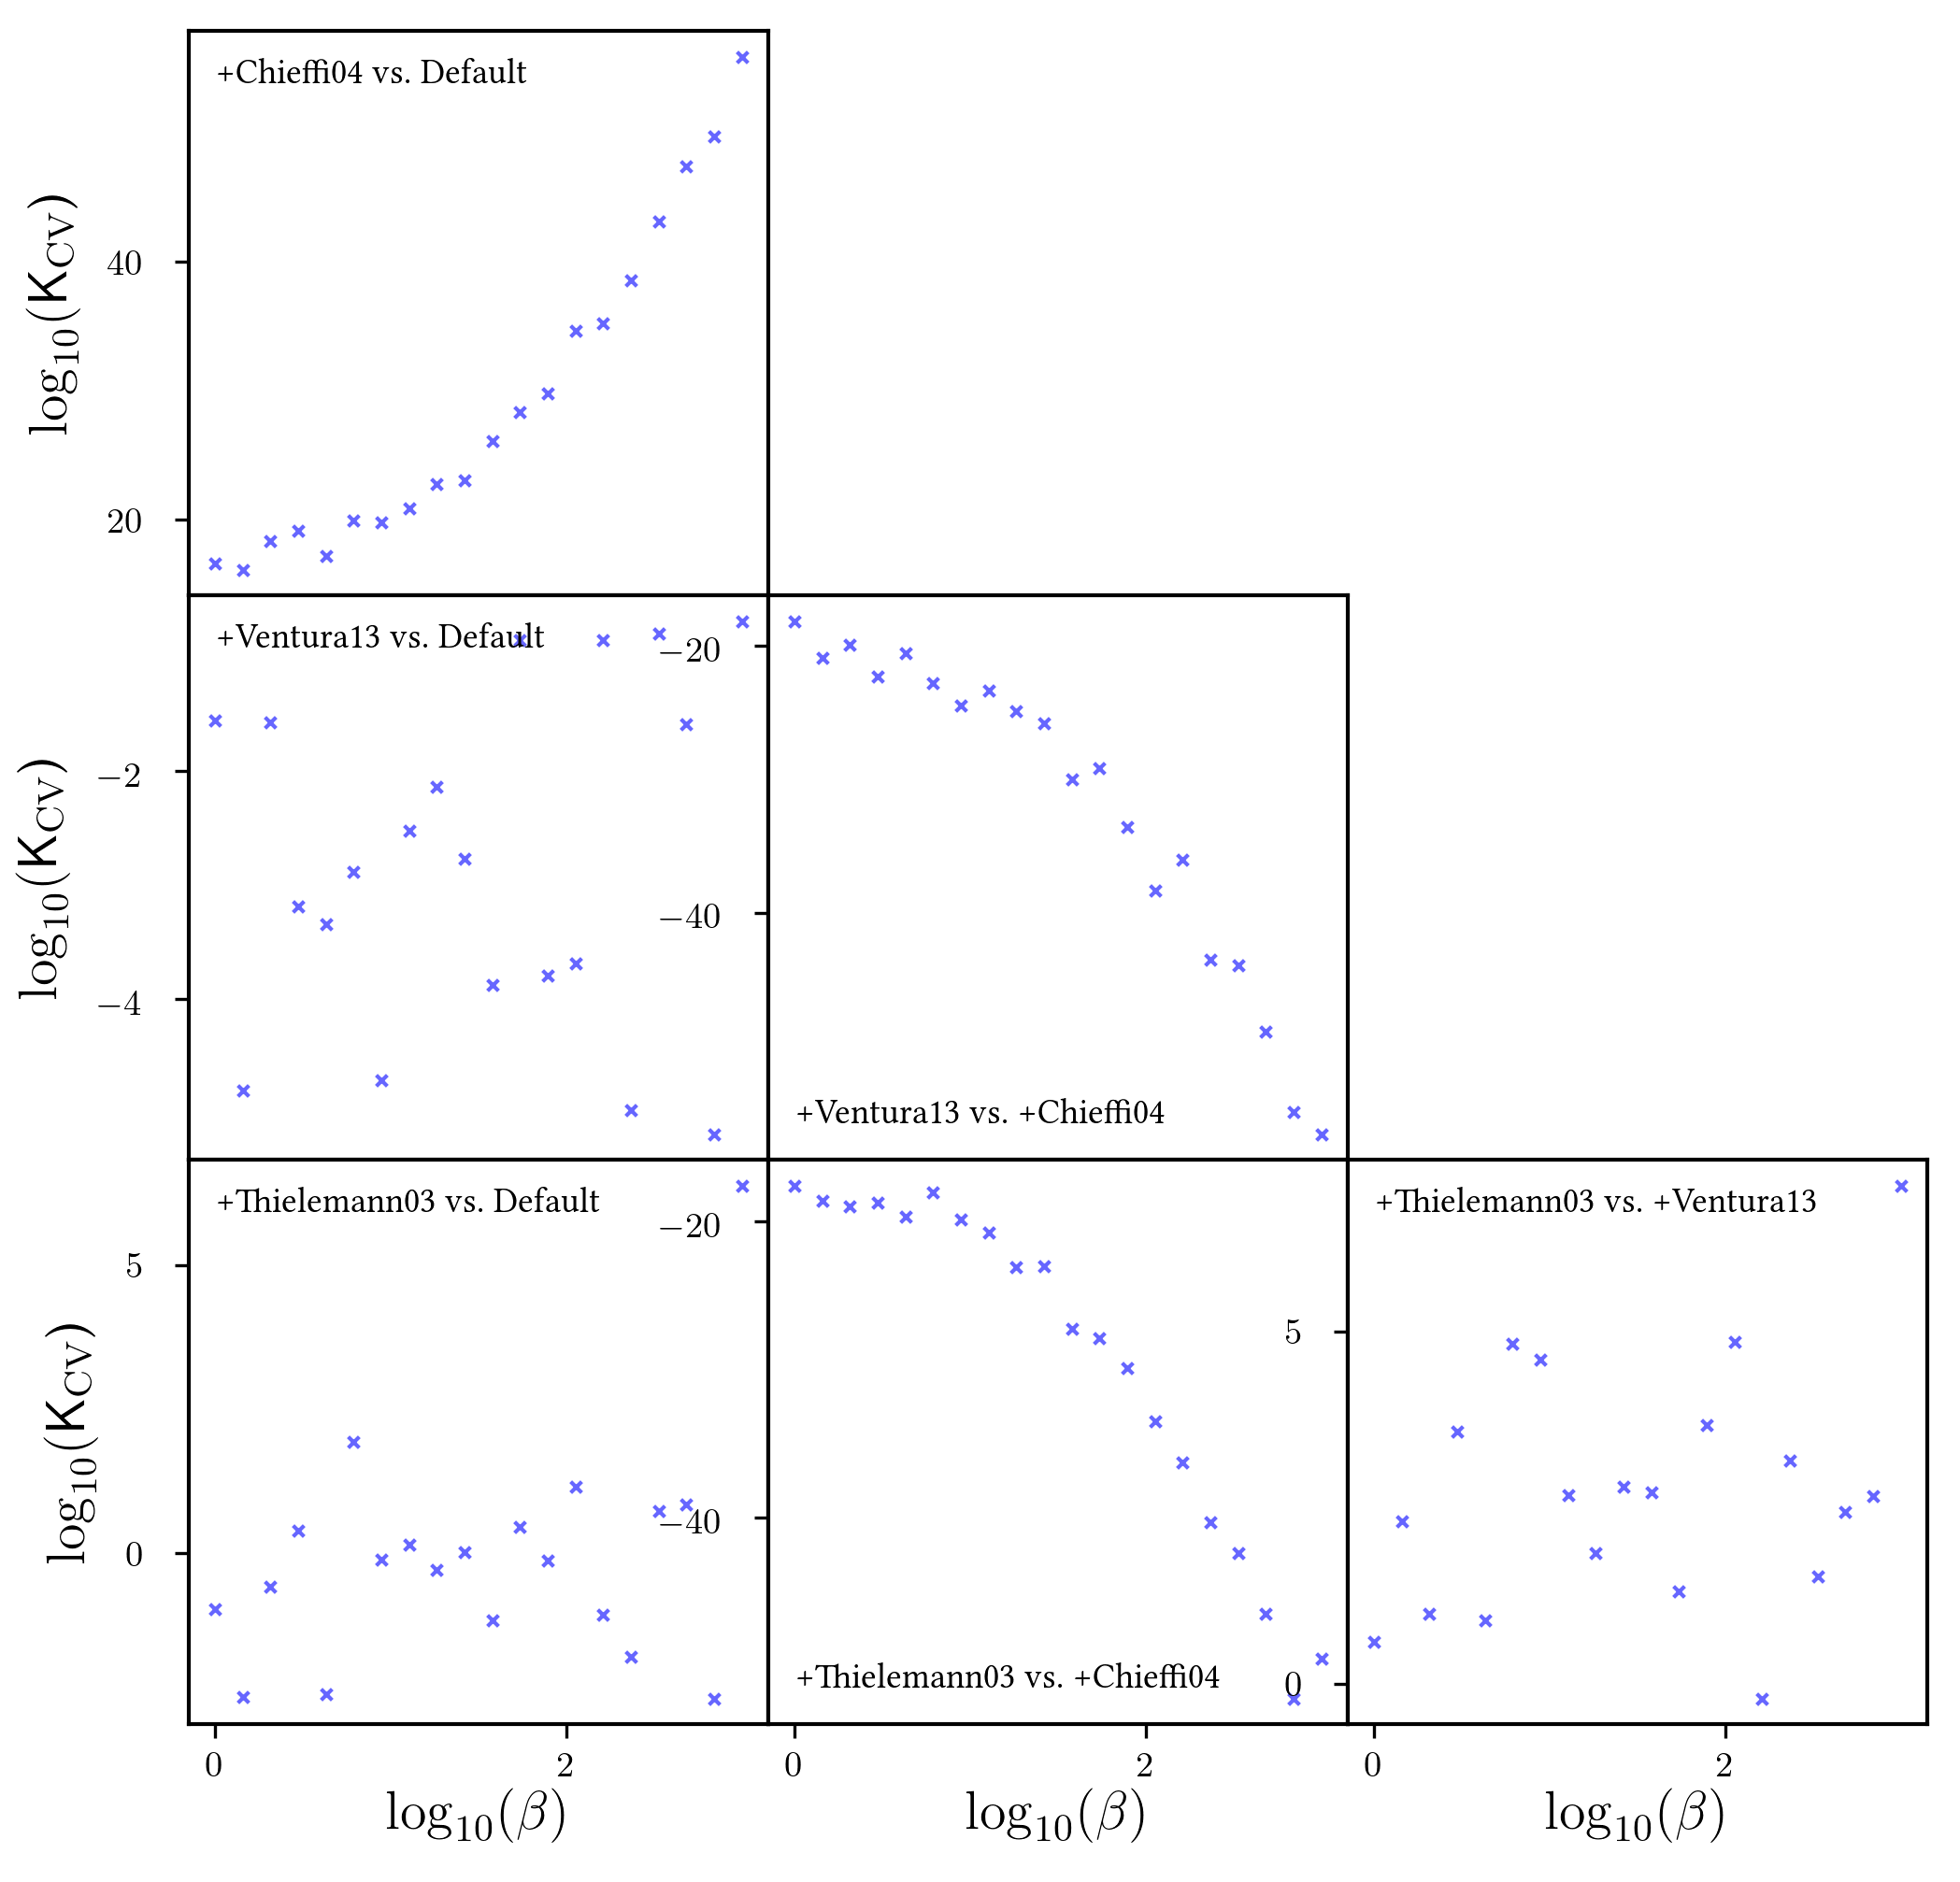

In [255]:
fig,axes = plt.subplots(nrows = 3, ncols = 3,figsize=(8.,8.),dpi=300)
text_size = 14
small_text = 9
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=small_text)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
alpha = 0.6
lw=2 # Linewidth
wspace = 0.0 # blankspace width between subplots
hspace = 0.0# blankspace height between subplots
plt.subplots_adjust(wspace=wspace,hspace=hspace)
# Create plot
for i in range(3):
    for j in range(3):
        axes[i,j].locator_params(nbins=3)
        if i>j or i==j:
            axes[i,j].scatter(np.log10(beta_param),np.log10(scores2[i+1]/scores2[j]),c='b',marker='x',alpha=alpha,s=8)
            if i == 2:
                axes[i,j].set_xlabel(r'$\log_{10}(\beta)$')
            if j == 0:
                axes[i,j].set_ylabel(r'$\log_{10}(\mathsf{K}_\mathrm{CV}$)')
            if i == 0 and j == 0 or i == 2 and j == 0 or i == 1 and j == 0 or i == 2 and j ==2:
                axes[i,j].text(0.05, 0.95, str(names[i+1])+' vs. '+str(names[j]),verticalalignment='top', horizontalalignment='left',transform=axes[i,j].transAxes,color='k', fontsize=small_text)
            else:
                axes[i,j].text(0.05, 0.05, str(names[i+1])+' vs. '+str(names[j]),verticalalignment='bottom', horizontalalignment='left',transform=axes[i,j].transAxes,color='k', fontsize=small_text)
        if j>i:
            axes[i,j].axis('off')
plt.show()
fig.savefig('PaperPlots/HoggComparison.pdf')


## No Sc scores

In [226]:
# Load datasets
B_Chi = np.load('/home/philcox/Save/SCORES/Chieffi04Score/Bayes_score - Chieffi04, Karakas_net_yield, Seitenzahl.npz')
B_Def = np.load('/home/philcox/Save/SCORES/Nomoto_netScore/Bayes_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
B_Chi_noSc = np.load('/home/philcox/Save/SCORES/Chieffi04NoSc/Bayes_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
B_Def_noSc = np.load('/home/philcox/Save/SCORES/Nomoto_netNoSc/Bayes_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
beta_param = B_Chi['beta_param']
scoreBC = B_Chi['score']
scoreBD = B_Def['score']
scoreBCnSc = B_Chi_noSc['score']
scoreBDnSc = B_Def_noSc['score']
score_errBC = B_Chi['score_err']
score_errBD = B_Def['score_err']
score_errBCnSc = B_Chi_noSc['score_err']
score_errBDnSc = B_Def_noSc['score_err']
B_Chi.close()
B_Def.close()
B_Chi_noSc.close()
B_Def_noSc.close()

In [237]:
scores3 = [scoreBD,scoreBC,scoreBDnSc,scoreBCnSc]
errors3 = [score_errBD,score_errBC,score_errBDnSc,score_errBCnSc]
names3 = ['Default','+Chieffi04','Default-Sc', '+Chieffi04-Sc']
shapes = ['x','v','.','^']
colors = ['k','r','b','g']

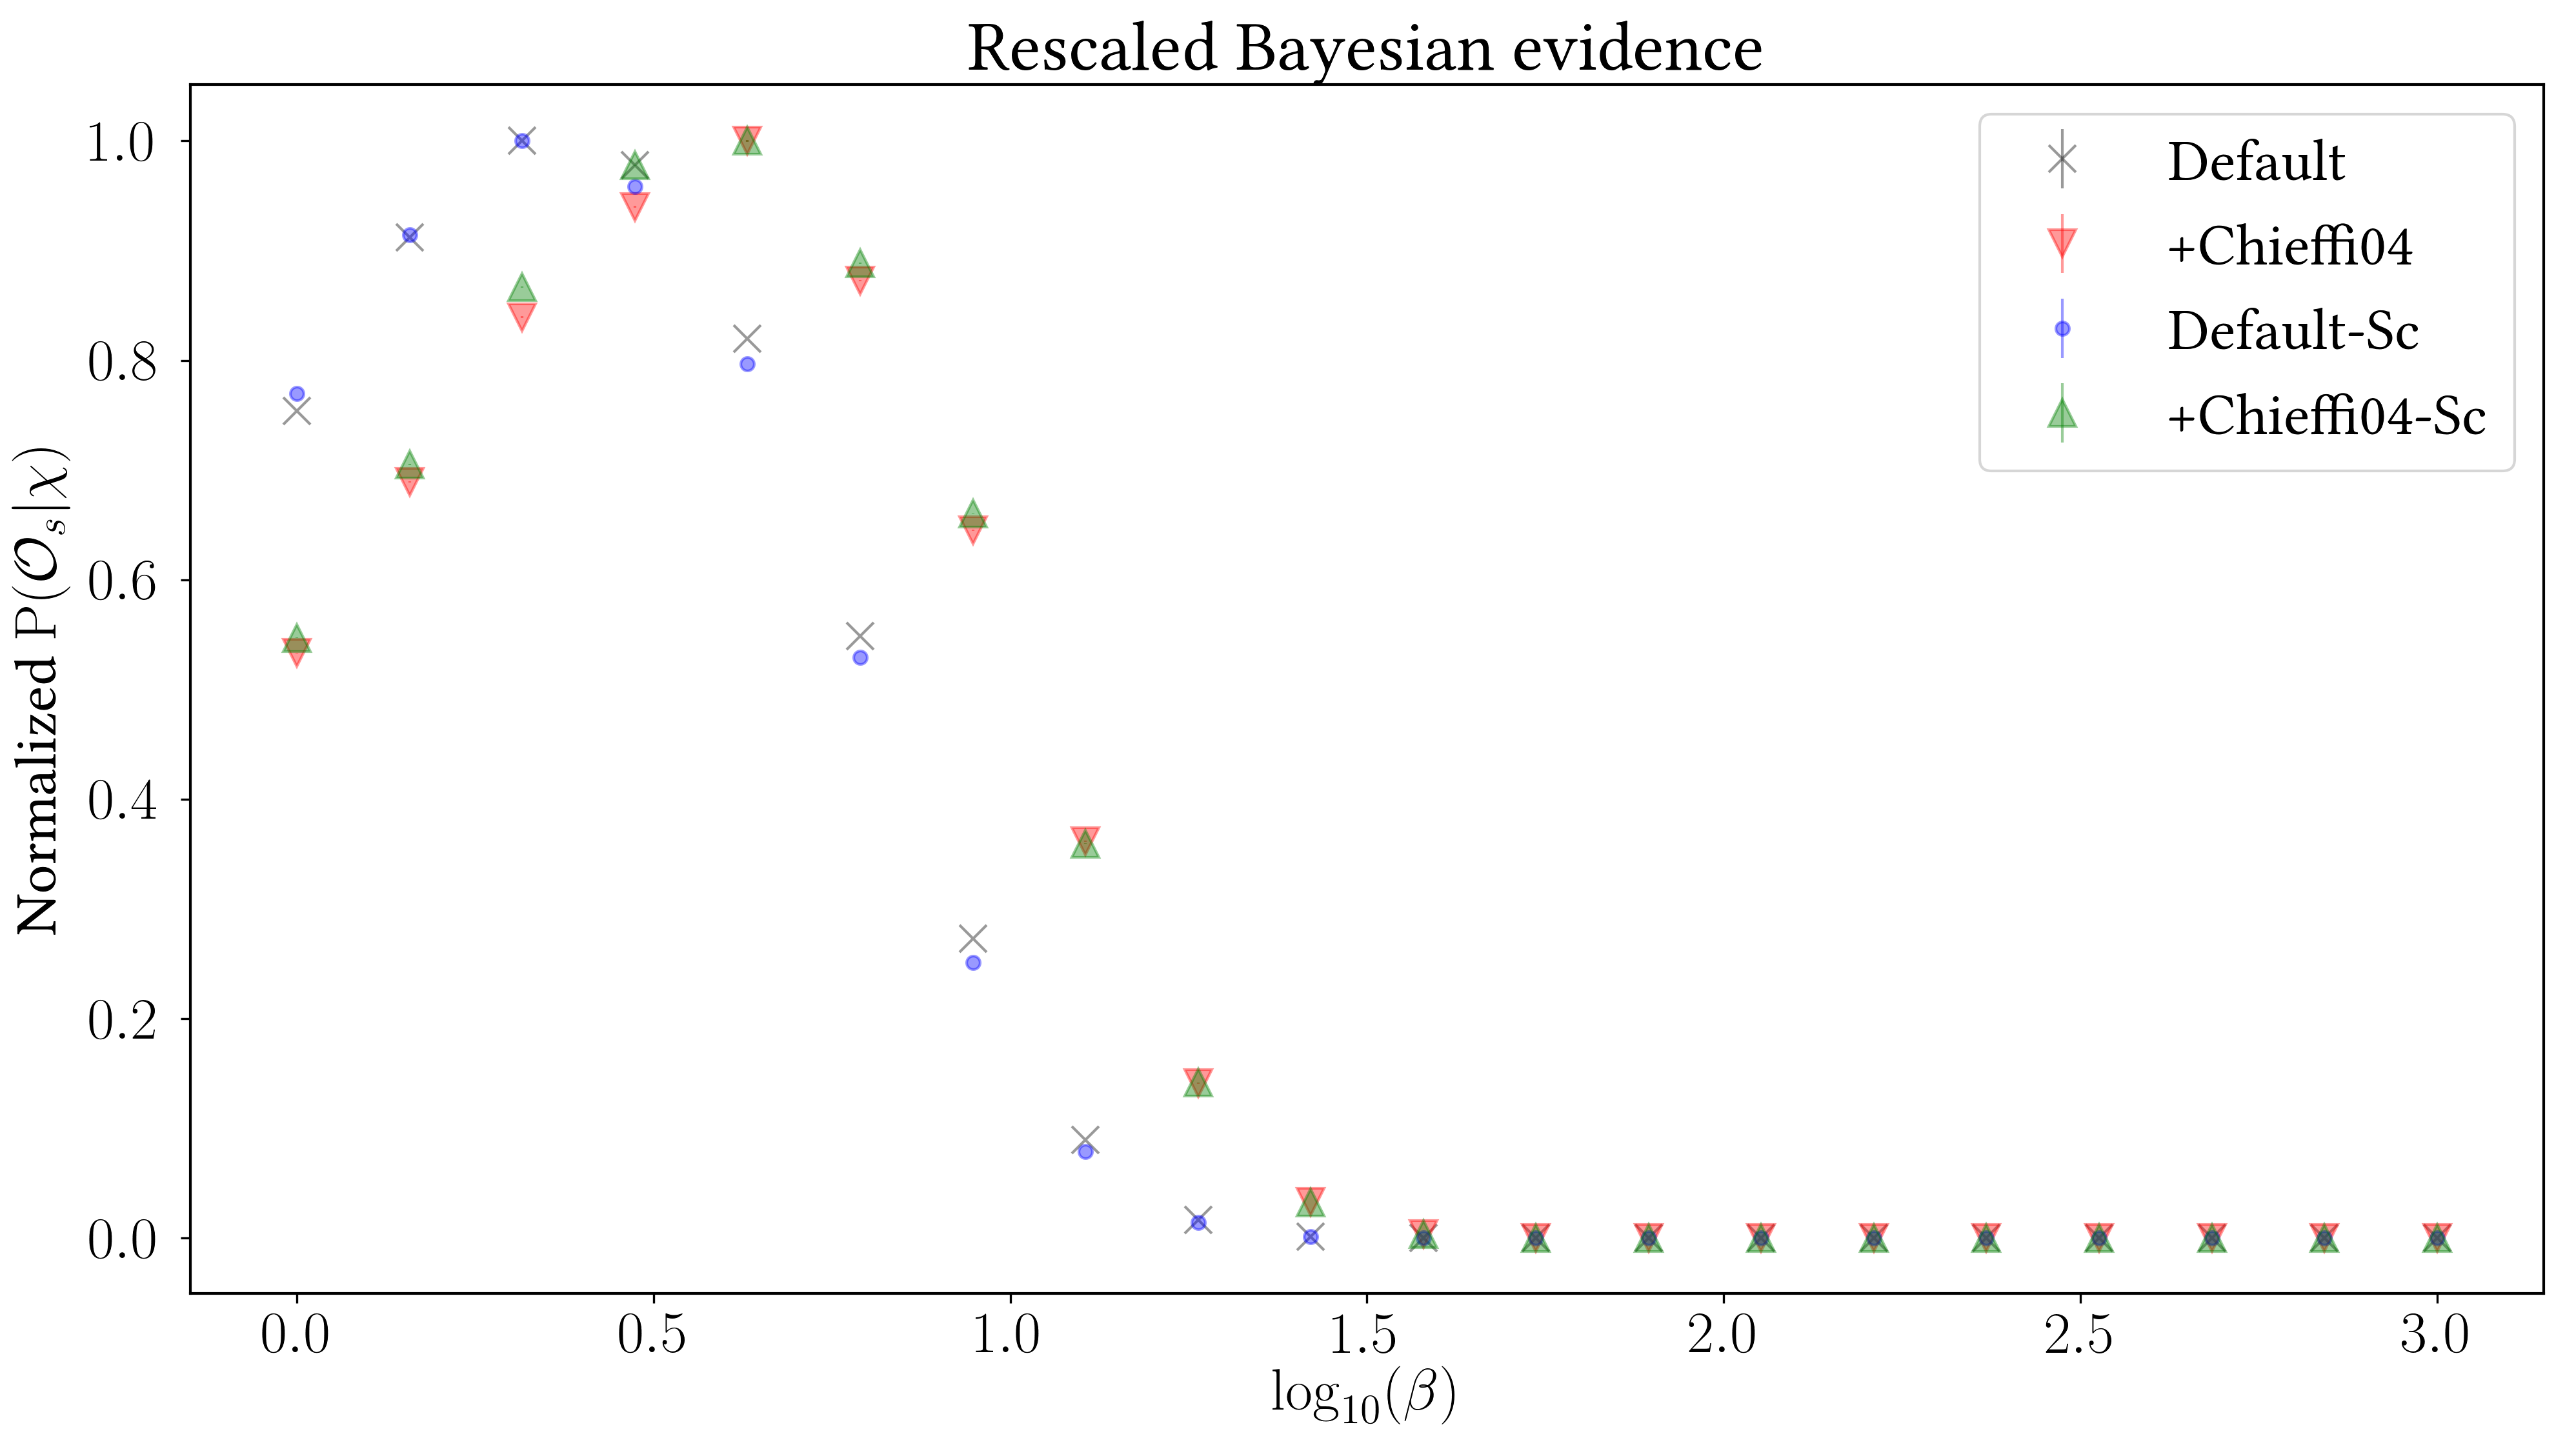

In [238]:
# Plot parameters
text_size = 22
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)
      

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),scores3[i]/max(scores3[i]),yerr=errors3[i],fmt=shapes[i],label=names3[i],ms=10,c=colors[i],alpha=0.4) 
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'Normalized $\mathrm{P}(\mathcal{O}_s|\chi)$')
plt.title('Rescaled Bayesian evidence')
plt.legend()
plt.savefig('PaperPlots/noScRescaledEvidence.pdf')

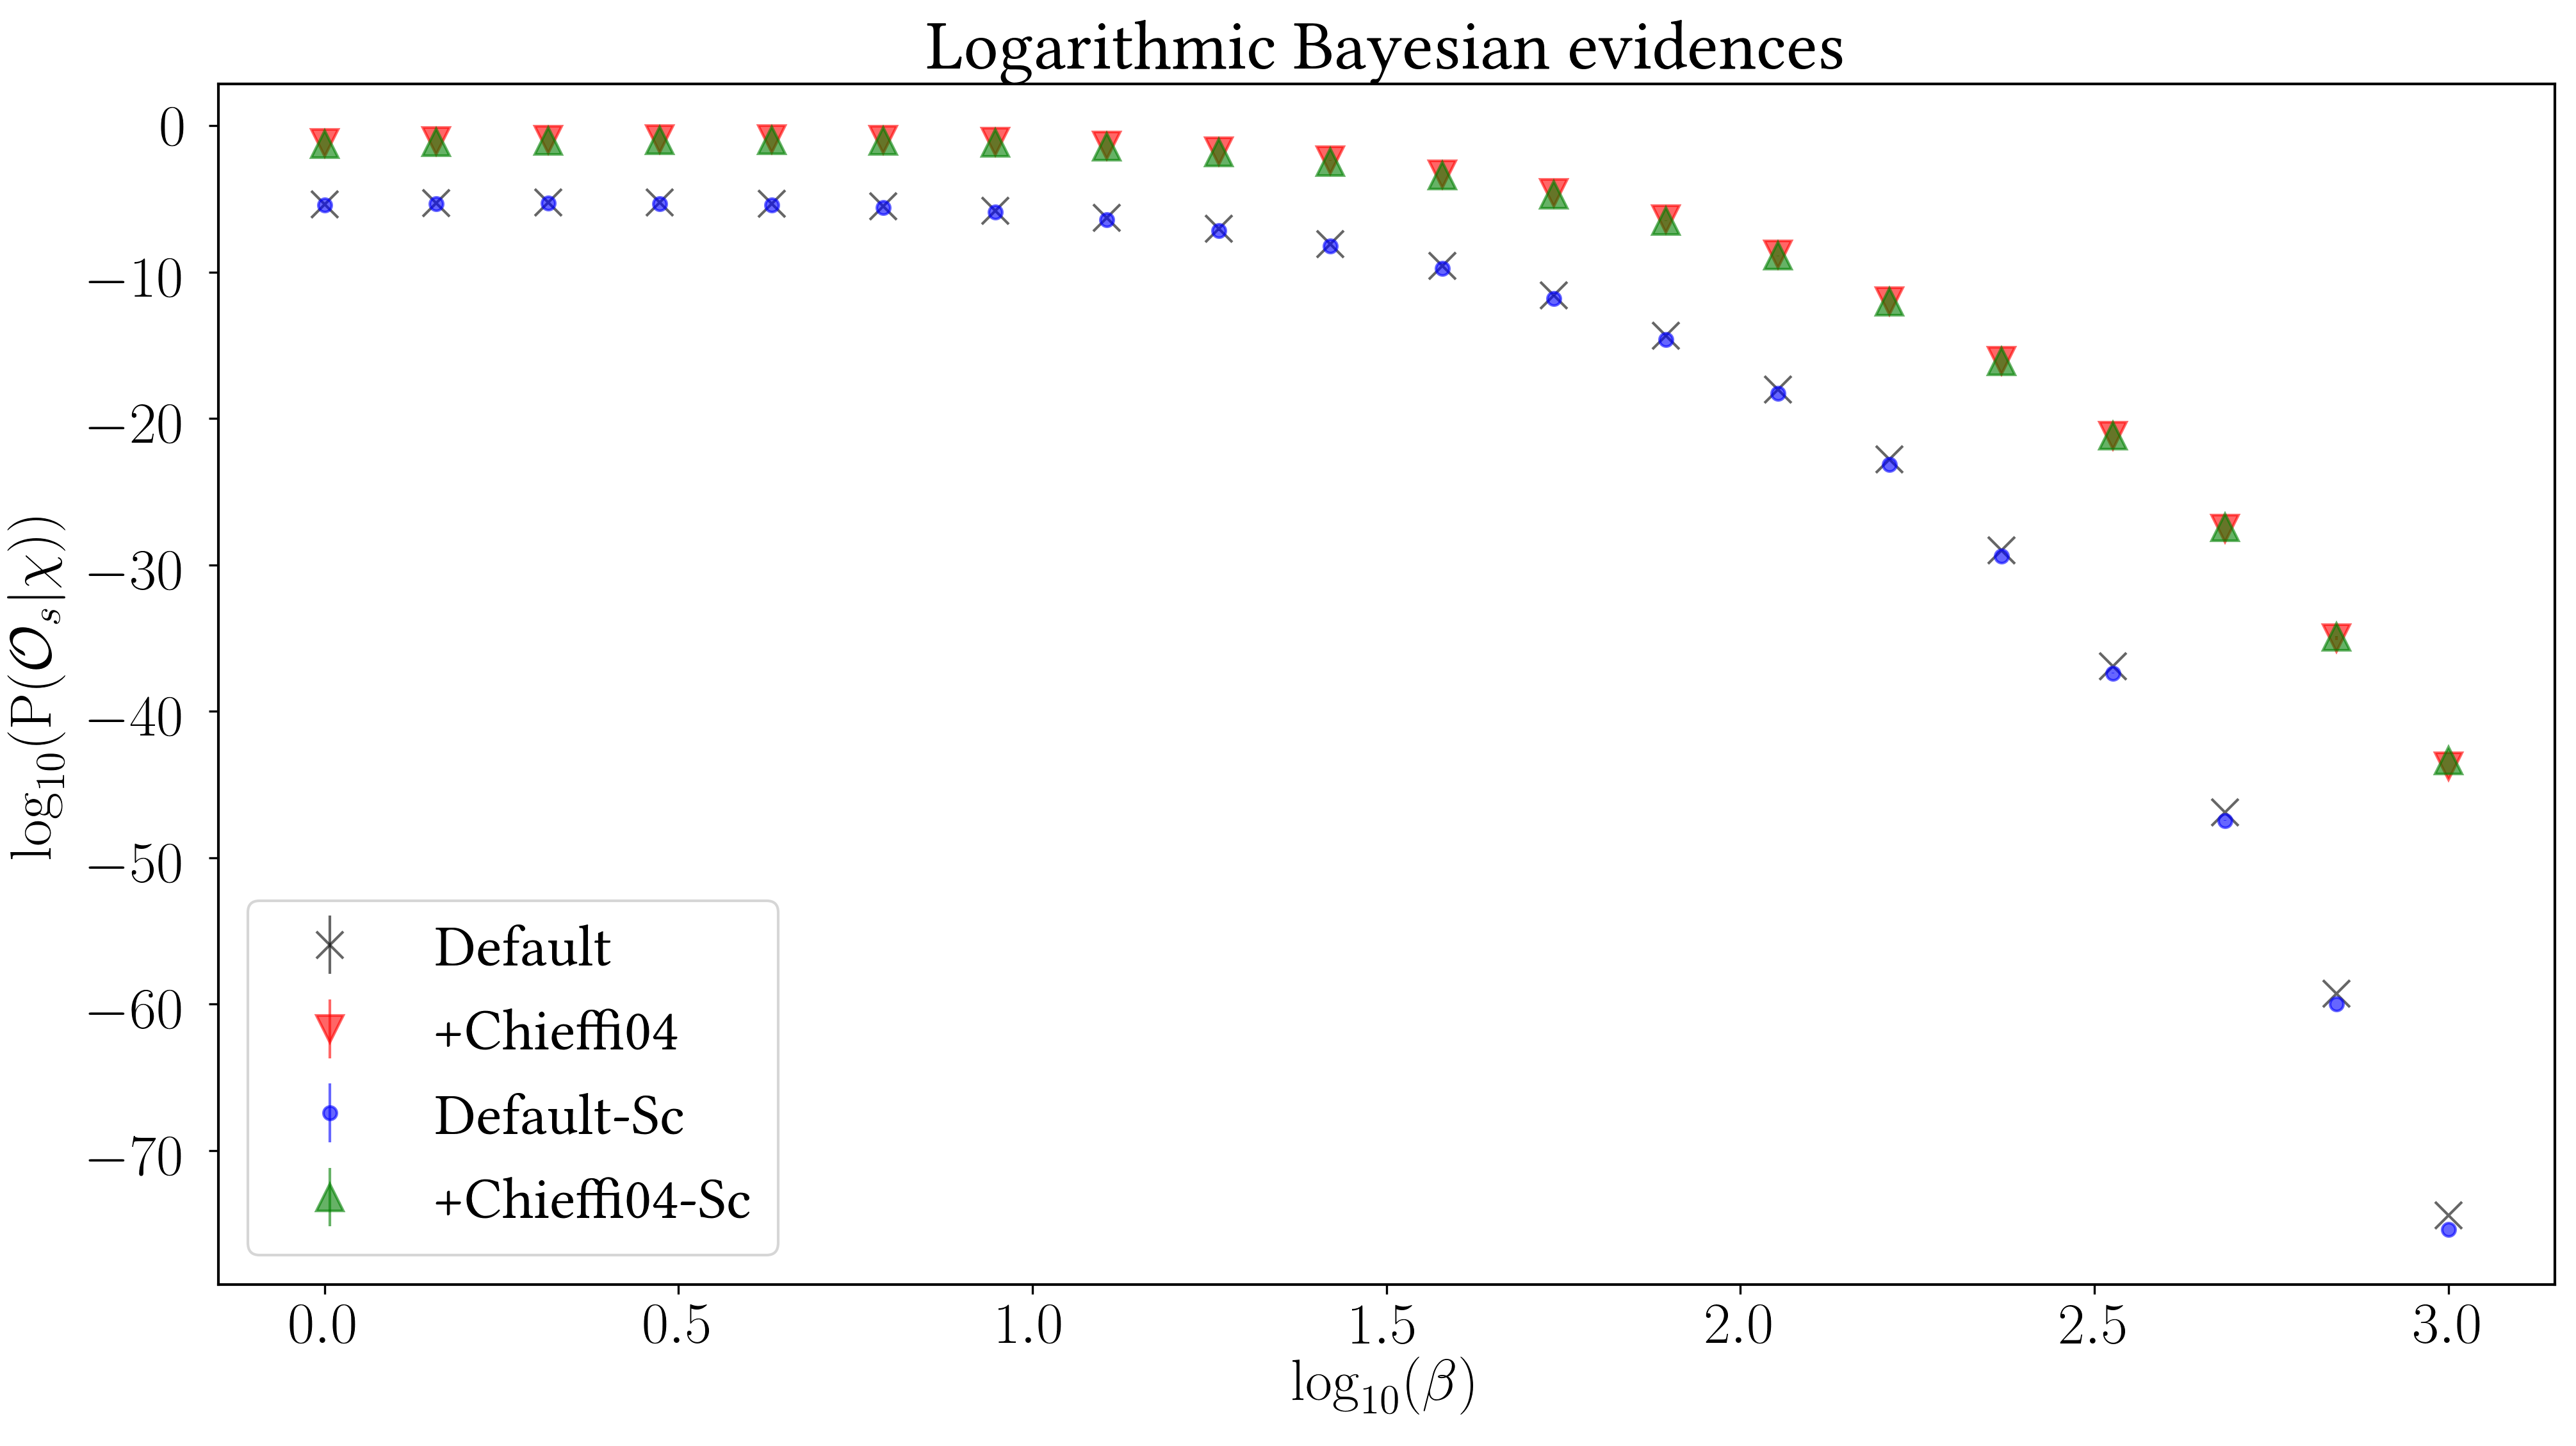

In [241]:
text_size = 22
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)

for i in [0,1,2,3]:
    log_error = errors3[i]/(scores3[i]*np.log(10))
    plt.errorbar(np.log10(beta_param),np.log10(scores3[i]),fmt=shapes[i],yerr = log_error,label=names3[i],c=colors[i],ms=10,alpha=0.6) 
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'$\log_{10}(\mathrm{P}(\mathcal{O}_s|\chi))$')
plt.legend()
plt.title('Logarithmic Bayesian evidences')
plt.savefig('PaperPlots/noSclogEvidence.pdf')

In [244]:
# Load datasets
H_Chi = np.load('/home/philcox/Save/SCORES/Chieffi04Score/Hogg_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
H_Def = np.load('/home/philcox/Save/SCORES/Nomoto_netScore/Hogg_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
H_Chi_noSc = np.load('/home/philcox/Save/SCORES/Chieffi04NoSc/Hogg_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
H_Def_noSc = np.load('/home/philcox/Save/SCORES/Nomoto_netNoSc/Hogg_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
beta_param = H_Chi['beta_param']
scoreHC = H_Chi['score']
scoreHD = H_Def['score']
scoreHC_noSc = H_Chi_noSc['score']
scoreHD_noSc = H_Def_noSc['score']
H_Chi.close()
H_Def.close()
H_Chi_noSc.close()
H_Def_noSc.close()

In [247]:
scores4 = [scoreHD,scoreHC,scoreHD_noSc,scoreHC_noSc]
names4 = ['Default','+Chieffi04','Default-Sc', '+Chieffi04-Sc']

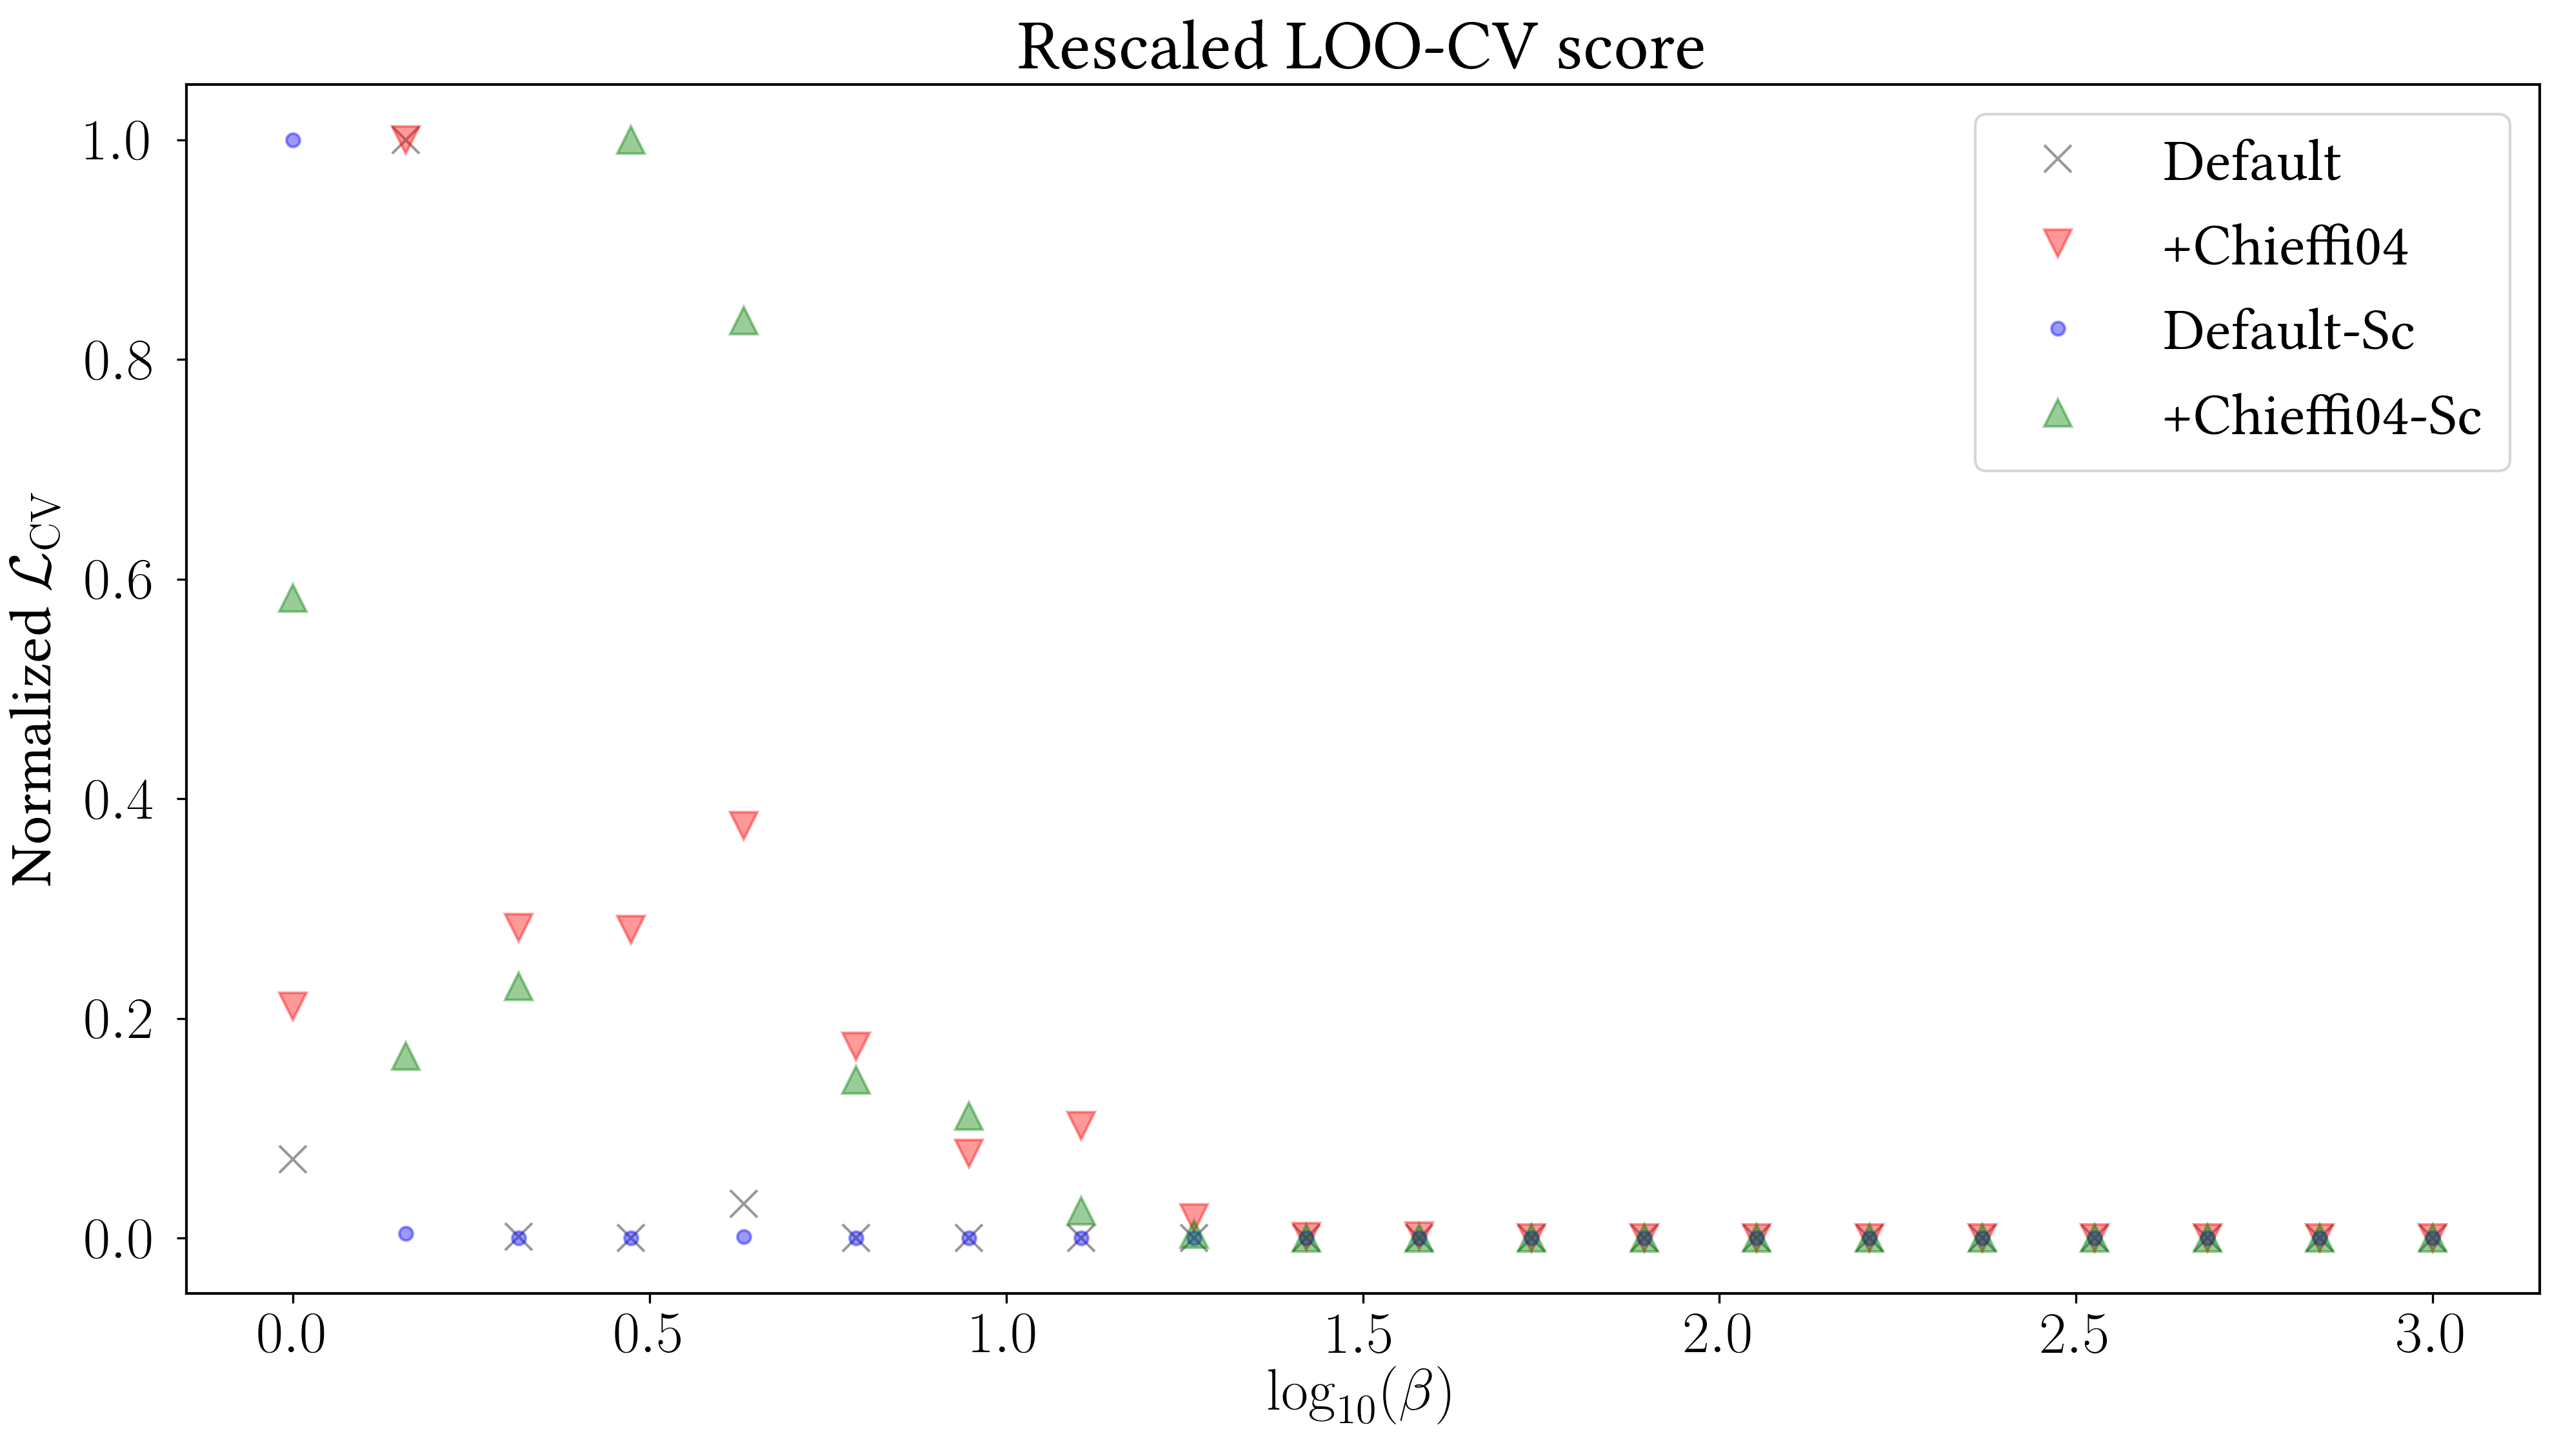

In [248]:
# Plot parameters
text_size = 22
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)
      

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),scores4[i]/max(scores4[i]),fmt=shapes[i],label=names4[i],ms=10,c=colors[i],alpha=0.4) 
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'Normalized $\mathcal{L}_\mathrm{CV}$')
plt.title('Rescaled LOO-CV score')
plt.legend()
plt.savefig('PaperPlots/noScRescaledHogg.pdf')

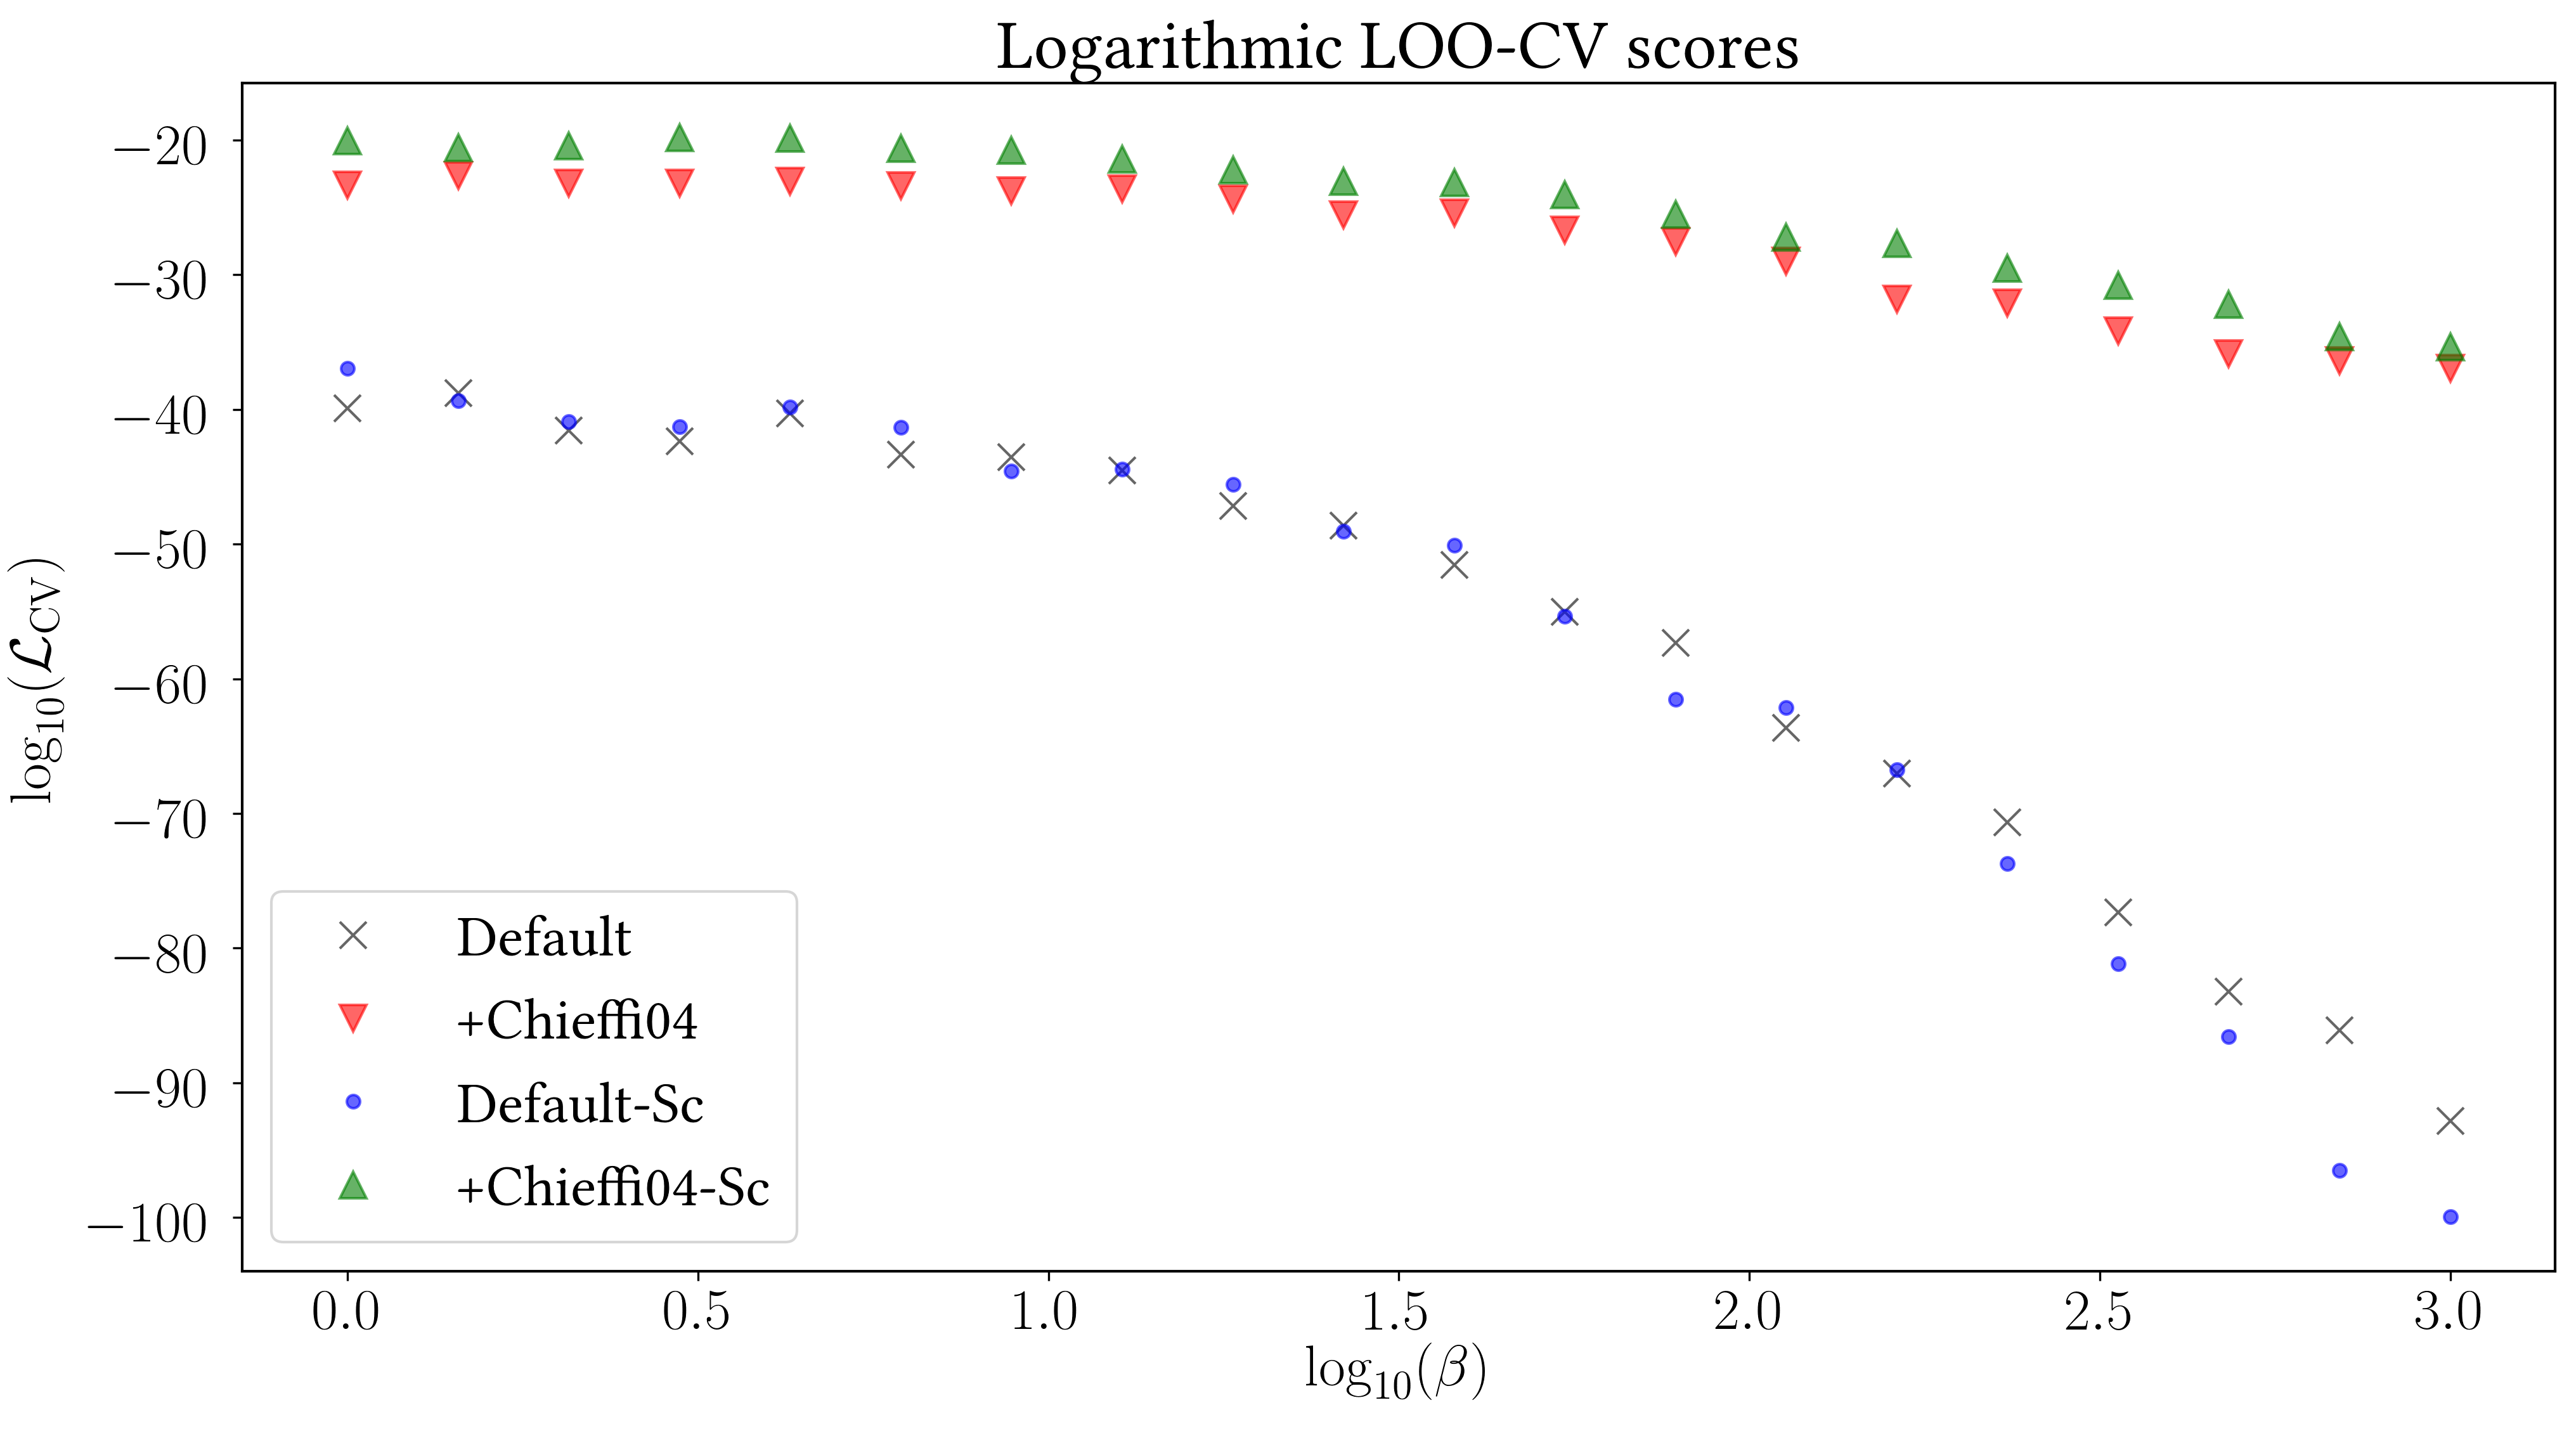

In [249]:
text_size = 22
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),np.log10(scores4[i]),fmt=shapes[i],label=names4[i],c=colors[i],ms=10,alpha=0.6) 
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'$\log_{10}(\mathcal{L}_\mathrm{CV})$')
plt.legend()
plt.title('Logarithmic LOO-CV scores')
plt.savefig('PaperPlots/noSclogHogg.pdf')